In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure visualization settings
plt.style.use('dark_background')
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

# Set custom colors for consistent branding
plt.rcParams['figure.facecolor'] = '#040D2E'  # Dark blue background
plt.rcParams['axes.facecolor'] = '#040D2E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['grid.color'] = '#1A2340'
plt.rcParams['font.family'] = 'sans-serif'

# Load the dataset
df = pd.read_csv('jobs_df.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nColumns in the dataset:")
for col in df.columns:
    print(f"- {col}")
print(f"\nNumber of unique companies: {df['company_name'].nunique()}")
print(f"Number of unique job titles: {df['job_title'].nunique()}")
print(f"Number of unique locations: {df['location'].nunique()}")


In [ ]:
# Display a sample of the data
df.head()


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a dataframe to display missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    display(missing_df)
else:
    print("No missing values found in the dataset.")


In [ ]:
# 1. Job Distribution by Location (City)
if not df.empty:
    # Count jobs by city and get top 15
    city_counts = df['city'].value_counts().nlargest(15)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create horizontal bar chart
    bars = sns.barplot(x=city_counts.values, y=city_counts.index, 
                      palette='magma', ax=ax)
    
    # Add count labels to the bars
    for i, v in enumerate(city_counts.values):
        ax.text(v + 0.5, i, str(v), color='white', va='center')
    
    # Set title and labels with explicit color
    plt.title('Top 15 Cities by Job Postings', fontsize=18, weight='bold', color='white')
    plt.xlabel('Number of Job Postings', fontsize=12, color='white')
    plt.ylabel('City', fontsize=12, color='white')
    
    # Style spines and remove grid
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#040D2E')
    ax.grid(False)
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 2. Top Companies with Most Job Listings
if not df.empty:
    # Count jobs by company and get top 15
    company_counts = df['company_name'].value_counts().nlargest(15)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create horizontal bar chart with vibrant colors
    bars = sns.barplot(x=company_counts.values, y=company_counts.index, 
                      palette='rocket', ax=ax)
    
    # Add count labels to the bars
    for i, v in enumerate(company_counts.values):
        ax.text(v + 0.5, i, str(v), color='white', va='center')
    
    # Set title and labels with explicit color
    plt.title('Top 15 Companies by Job Postings', fontsize=18, weight='bold', color='white')
    plt.xlabel('Number of Job Postings', fontsize=12, color='white')
    plt.ylabel('Company', fontsize=12, color='white')
    
    # Style spines and remove grid
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#040D2E')
    ax.grid(False)
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 3. Job Function Analysis
if not df.empty:
    # Clean the 'function' column by filling nulls or empties
    df['function'].fillna('Not Specified', inplace=True)
    df['function'] = df['function'].replace('', 'Not Specified')
    
    # Count jobs by function and get top 10
    function_counts = df['function'].value_counts().nlargest(10)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create pie chart with custom colors
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['#7A0BC0', '#270082', '#4E9F3D', '#D8315B', '#1E5128', '#F7EC09', '#FF5C8D', '#FEA82F', '#0061A8', '#8E2657']
    
    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        function_counts.values, 
        labels=None,
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors,
        wedgeprops=dict(width=0.5, edgecolor='white'),
        textprops=dict(color='white')
    )
    
    # Create circular hole (to make it a donut chart)
    centre_circle = plt.Circle((0,0), 0.35, fc='#040D2E')
    ax.add_patch(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_aspect('equal')
    
    # Create legend
    ax.legend(
        wedges, 
        function_counts.index,
        title="Job Functions",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        prop={'size': 10}
    )
    
    # Style the legend
    leg = ax.get_legend()
    leg.get_title().set_color('white')
    for text in leg.get_texts():
        text.set_color('white')
    leg.get_frame().set_facecolor('#040D2E')
    leg.get_frame().set_edgecolor('white')
    
    # Set title with explicit color
    plt.title('Distribution of Job Functions', fontsize=18, weight='bold', color='white')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 4. Seniority Level Distribution
if not df.empty:
    # Clean the 'seniority_level' column by filling nulls or empties
    df['seniority_level'].fillna('Not Specified', inplace=True)
    df['seniority_level'] = df['seniority_level'].replace('', 'Not Specified')
    
    # Count jobs by seniority level
    seniority_counts = df['seniority_level'].value_counts()
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create the bar chart with custom gradient
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['#FF5E78', '#FF5C8D', '#E15FED', '#9C3587', '#782CA8', '#621CAF', '#5011A5', '#4C0070']
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    
    # Plot with a colorful gradient
    bars = ax.bar(
        seniority_counts.index, 
        seniority_counts.values,
        color=custom_cmap(np.linspace(0, 1, len(seniority_counts)))
    )
    
    # Add count labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.5,
            f'{height}',
            ha='center', 
            va='bottom',
            color='white',
            fontsize=10
        )
    
    # Set title and labels with explicit color
    plt.title('Job Postings by Seniority Level', fontsize=18, weight='bold', color='white')
    plt.xlabel('Seniority Level', fontsize=12, color='white')
    plt.ylabel('Number of Job Postings', fontsize=12, color='white')
    
    # Set tick colors to white
    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(color='white')
    
    # Style spines
    for spine in ax.spines.values():
        spine.set_color('#1A2340')
    
    # Add a light grid for better readability
    ax.grid(axis='y', color='#1A2340', linestyle='-', linewidth=0.5, alpha=0.7)
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 5. Employment Type Breakdown
if not df.empty:
    # Clean the 'employment_type' column by filling nulls or empties
    df['employment_type'].fillna('Not Specified', inplace=True)
    df['employment_type'] = df['employment_type'].replace('', 'Not Specified')
    
    # Count jobs by employment type
    employment_counts = df['employment_type'].value_counts()
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create custom colormap
    colors = ['#FF9671', '#FFC75F', '#F9F871', '#D65DB1', '#00C9A7', '#4FFBDF', '#845EC2']
    
    # Create a horizontal bar chart
    bars = ax.barh(
        employment_counts.index, 
        employment_counts.values,
        color=colors[:len(employment_counts)],
        height=0.6
    )
    
    # Add count labels
    for bar in bars:
        width = bar.get_width()
        ax.text(
            width + 2,
            bar.get_y() + bar.get_height()/2,
            f'{width}',
            ha='left', 
            va='center',
            color='white',
            fontsize=10,
            fontweight='bold'
        )
    
    # Set title and labels with explicit color
    plt.title('Job Postings by Employment Type', fontsize=18, weight='bold', color='white')
    plt.xlabel('Number of Job Postings', fontsize=12, color='white')
    plt.ylabel('Employment Type', fontsize=12, color='white')
    
    # Set tick colors to white
    plt.xticks(color='white')
    plt.yticks(color='white')
    
    # Style spines
    for spine in ax.spines.values():
        spine.set_color('#1A2340')
    
    # Add a light grid for better readability
    ax.grid(axis='x', color='#1A2340', linestyle='-', linewidth=0.5, alpha=0.7)
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 6. Industry Concentration
if not df.empty:
    # Clean the 'industry' column by filling nulls or empties
    df['industry'].fillna('Not Specified', inplace=True)
    df['industry'] = df['industry'].replace('', 'Not Specified')
    
    # Count jobs by industry and get top 15
    industry_counts = df['industry'].value_counts().nlargest(15)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(16, 10))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create a treemap
    from squarify import squarify
    
    # Normalize sizes for better visualization
    sizes = industry_counts.values
    norm = plt.Normalize(min(sizes), max(sizes))
    colors = plt.cm.plasma(norm(sizes))
    
    # Create the treemap
    squarify.plot(
        sizes=sizes, 
        label=[f"{l}\n({s})" for l, s in zip(industry_counts.index, sizes)],
        alpha=.8,
        color=colors,
        text_kwargs={'color':'white', 'fontsize':10, 'fontweight':'bold'},
        ax=ax
    )
    
    # Set title with explicit color
    plt.title('Top 15 Industries by Job Postings', fontsize=18, weight='bold', color='white')
    
    # Remove axes
    plt.axis('off')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 7. Time-based Job Posting Trends
if not df.empty:
    # Extract the time posted information
    df['time_value'] = df['time_posted'].str.extract('(\d+)').astype(float)
    df['time_unit'] = df['time_posted'].str.extract('(\d+)\s+(\w+)')[1]
    
    # Group by time unit and compute counts
    time_counts = df.groupby('time_unit').size().reset_index(name='count')
    
    # Reorder based on time unit priority (day < week < month)
    time_order = {'day': 0, 'days': 0, 'week': 1, 'weeks': 1, 'month': 2, 'months': 2}
    time_counts['order'] = time_counts['time_unit'].map(time_order)
    time_counts = time_counts.sort_values('order')
    
    # Create a more meaningful label for display
    time_counts['display_label'] = time_counts['time_unit']
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create a radar chart (polar bar chart)
    theta = np.linspace(0.0, 2 * np.pi, len(time_counts), endpoint=False)
    
    # Create custom colormap
    colors = ['#E56399', '#7F96FF', '#A6D8D4', '#CFBAE1', '#63C7B2']
    
    # Plot the bars
    bars = ax.bar(
        theta, 
        time_counts['count'],
        width=0.5,
        color=colors[:len(time_counts)],
        alpha=0.8
    )
    
    # Add labels
    for i, (bar, label, count) in enumerate(zip(bars, time_counts['display_label'], time_counts['count'])):
        angle = theta[i]
        
        # Adjust label position based on angle
        if 0 <= angle < np.pi/2 or 3*np.pi/2 < angle <= 2*np.pi:
            ha = 'left'
        else:
            ha = 'right'
            
        if 0 <= angle < np.pi:
            va = 'bottom'
        else:
            va = 'top'
            
        # Position the label at the end of the bar
        radius = bar.get_height() + 20
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        
        # Add the label
        ax.text(
            x, y, 
            f"{label}: {count}",
            ha=ha, va=va,
            color='white',
            fontweight='bold',
            bbox=dict(facecolor='#040D2E', edgecolor='white', alpha=0.7, boxstyle='round,pad=0.5')
        )
    
    # Set title with explicit color
    plt.title('Job Postings by Time Posted', fontsize=18, weight='bold', color='white')
    
    # Remove grid and axis
    ax.grid(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 8. Job Function & Industry Correlation
if not df.empty:
    # Clean the 'function' and 'industry' columns
    df['function'].fillna('Not Specified', inplace=True)
    df['industry'].fillna('Not Specified', inplace=True)
    
    # Get top 8 functions and industries for a cleaner visualization
    top_functions = df['function'].value_counts().nlargest(8).index.tolist()
    top_industries = df['industry'].value_counts().nlargest(8).index.tolist()
    
    # Filter the dataframe
    filtered_df = df[df['function'].isin(top_functions) & df['industry'].isin(top_industries)]
    
    # Create the cross-tabulation
    heatmap_data = pd.crosstab(filtered_df['function'], filtered_df['industry'])
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(16, 12))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create a custom colormap for dark background
    cmap = sns.color_palette("rocket_r", as_cmap=True)
    
    # Create the heatmap
    heatmap = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='d',
        cmap=cmap,
        linewidths=1,
        ax=ax,
        cbar_kws={'label': 'Number of Jobs'},
        annot_kws={"color": "white", "fontsize": 10}
    )
    
    # Set title and labels with explicit color
    plt.title('Job Function & Industry Correlation', fontsize=18, weight='bold', color='white')
    plt.xlabel('Industry', fontsize=12, color='white')
    plt.ylabel('Job Function', fontsize=12, color='white')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(color='white')
    
    # Style the colorbar
    cbar = heatmap.collections[0].colorbar
    cbar.ax.set_ylabel('Number of Jobs', color='white')
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(plt.getp(cbar.ax, 'yticklabels'), color='white')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 9. Geographic Distribution of Jobs
if not df.empty:
    # Clean and prepare location data
    df['state'] = df['location'].str.split(', ').str[-2]
    
    # Count jobs by state and get top 10
    state_counts = df['state'].value_counts().nlargest(10)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create custom colormap
    colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(state_counts)))
    
    # Create pie chart with no labels (we'll add them manually)
    wedges, texts = ax.pie(
        state_counts.values,
        labels=None,  # Remove default labels
        autopct='',  # Remove autopct to place manually
        startangle=90,
        colors=colors,
        explode=[0.1 if i < 3 else 0 for i in range(len(state_counts))],  # Explode top 3
        wedgeprops=dict(width=0.4, edgecolor='white'),  # For donut chart effect
        textprops=dict(color='white', fontweight='bold')
    )
    
    # Create a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.25, fc='#040D2E')
    fig.gca().add_artist(centre_circle)
    
    # Add both state names and percentage labels inside the pie slices
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        
        # Calculate percentage
        percentage = state_counts.values[i] / sum(state_counts.values) * 100
        
        # Determine state name position (closer to outer edge)
        state_radius = 0.75
        
        # Determine percentage position (closer to inner edge)
        pct_radius = 0.55
        
        # Place the state name
        ax.text(x * state_radius, y * state_radius, state_counts.index[i], 
                ha='center', va='center', 
                fontsize=10, color='white', 
                fontweight='bold')
        
        # Place the percentage with a background box for better visibility
        ax.text(x * pct_radius, y * pct_radius, f'{percentage:.1f}%', 
                ha='center', va='center', 
                fontsize=9, color='white', 
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", fc='#040D2E', ec="white", alpha=0.7))
    
    # Add a title with explicit color
    plt.title('Top 10 States by Job Postings', fontsize=18, weight='bold', color='white')
    
    # Add a legend with job counts - moved lower on the figure
    legend_labels = [f'{state}: {count}' for state, count in zip(state_counts.index, state_counts.values)]
    plt.legend(
        wedges, 
        legend_labels,
        title="States",
        loc="center left",
        bbox_to_anchor=(1, 0.3, 0.5, 1),  # Moved lower by adjusting y-coordinate
        prop={'size': 10}
    )
    
    # Style the legend
    leg = ax.get_legend()
    leg.get_title().set_color('white')
    for text in leg.get_texts():
        text.set_color('white')
    leg.get_frame().set_facecolor('#040D2E')
    leg.get_frame().set_edgecolor('white')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 10. Seniority Level vs. Employment Type Distribution
if not df.empty:
    # Clean the necessary columns
    df['seniority_level'].fillna('Not Specified', inplace=True)
    df['employment_type'].fillna('Not Specified', inplace=True)
    
    # Get the most common seniority levels and employment types for better visualization
    top_seniority = df['seniority_level'].value_counts().nlargest(5).index.tolist()
    top_employment = df['employment_type'].value_counts().nlargest(5).index.tolist()
    
    # Filter the dataframe
    filtered_df = df[df['seniority_level'].isin(top_seniority) & df['employment_type'].isin(top_employment)]
    
    # Create the cross-tabulation
    crosstab = pd.crosstab(filtered_df['seniority_level'], filtered_df['employment_type'])
    
    # Normalize by row (seniority level)
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create the stacked bar chart
    crosstab_pct.plot(
        kind='barh', 
        stacked=True,
        colormap='magma',
        ax=ax,
        width=0.7
    )
    
    # Add a line for 100%
    ax.axvline(x=100, color='white', linestyle='--', alpha=0.3)
    
    # Set title and labels with explicit color
    plt.title('Employment Type Distribution by Seniority Level', fontsize=18, weight='bold', color='white')
    plt.xlabel('Percentage', fontsize=12, color='white')
    plt.ylabel('Seniority Level', fontsize=12, color='white')
    
    # Customize tick colors
    plt.xticks(color='white')
    plt.yticks(color='white')
    
    # Customize legend
    leg = ax.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    leg.get_frame().set_facecolor('#040D2E')
    leg.get_frame().set_edgecolor('white')
    leg.get_title().set_color('white')
    for text in leg.get_texts():
        text.set_color('white')
    
    # Customize spines
    for spine in ax.spines.values():
        spine.set_color('white')
        spine.set_linewidth(0.5)
    
    # Add value labels inside the bars
    for i, seniority in enumerate(crosstab_pct.index):
        cumulative = 0
        for j, employment in enumerate(crosstab_pct.columns):
            value = crosstab_pct.iloc[i, j]
            if value > 5:  # Only show labels for segments with > 5%
                ax.text(
                    cumulative + value/2,
                    i,
                    f'{value:.1f}%',
                    va='center',
                    ha='center',
                    color='white',
                    fontsize=9,
                    fontweight='bold'
                )
            cumulative += value
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


### Clean Up Skills Categories

Now we'll clean up the skills by:
1. Removing the 'Other' category
2. Merging similar technology categories
3. Merging similar supply chain categories

In [41]:
if not df.empty:
    # Create a clean skills dataframe
    skills_df_clean = skills_df.copy()
    
    # 1. Remove 'Other' category
    skills_df_clean = skills_df_clean[skills_df_clean['skill'] != 'Other']
    
    # 2. Create a mapping dictionary for merging similar categories
    skill_mapping = {
        'Information Technology': 'Information Technology',
        'and Information Technology': 'Information Technology',
        'Engineering and Information Technology': 'Engineering and Information Technology',
        'Supply Chain': 'Supply Chain',
        'and Supply Chain': 'Supply Chain'
    }
    
    # 3. Function to standardize skill names
    def standardize_skill(skill):
        # Direct mapping from dictionary
        if skill in skill_mapping:
            return skill_mapping[skill]
        
        # Check for technology terms
        if 'Information Technology' in skill and skill != 'Engineering and Information Technology':
            return 'Information Technology'
        
        # Check for supply chain terms
        if 'Supply Chain' in skill:
            return 'Supply Chain'
            
        # Otherwise keep as is
        return skill
    
    # Apply the standardization
    skills_df_clean['skill_standardized'] = skills_df_clean['skill'].apply(standardize_skill)
    
    # Check the results of our cleaning
    print("\nTop 20 Skills after standardization:")
    display(skills_df_clean['skill_standardized'].value_counts().head(20))
    
    # Count technology-related skills
    tech_skills = skills_df_clean[skills_df_clean['skill_standardized'].str.contains('Technology')]
    print(f"\nTotal technology-related job postings: {len(tech_skills)}")
    
    # Count supply chain-related skills
    supply_chain_skills = skills_df_clean[skills_df_clean['skill_standardized'] == 'Supply Chain']
    print(f"Total supply chain-related job postings: {len(supply_chain_skills)}")
else:
    print("DataFrame is empty, skipping cleaning.")



Top 20 Skills after standardization:


skill_standardized
Information Technology                    140
Management and Manufacturing               90
Engineering and Information Technology     74
Sales                                      56
Business Development and Sales             52
Supply Chain                               52
Management                                 52
Sales and Business Development             49
Finance and Sales                          43
Human Resources                            39
Analyst                                    38
Research                                   37
Finance                                    31
Distribution                               30
Administrative                             28
Marketing                                  22
Engineering                                20
Customer Service                           19
Consulting                                 19
Advertising                                19
Name: count, dtype: int64


Total technology-related job postings: 214
Total supply chain-related job postings: 52


In [ ]:
# --- Top 10 Most In-Demand Skills (Overall) with cleaned data ---
if not df.empty:
    top_skills = skills_df_clean['skill_standardized'].value_counts().nlargest(10)

    # Set the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create the bar plot with a more vibrant palette
    bars = sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma', 
                      hue=top_skills.index, dodge=False, ax=ax)
    
    # Set title and labels with explicit color
    plt.title('Top 10 Most In-Demand Skills/Functions (Cleaned)', fontsize=18, weight='bold', color='white')
    plt.xlabel('Number of Job Postings', fontsize=12, color='white')
    plt.ylabel('Skill / Job Function', fontsize=12, color='white')
    plt.legend([],[], frameon=False) # Hide legend
    
    # Set all spines to be visible but with dark background color
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#040D2E')
    
    # Add count labels to the bars
    for i, v in enumerate(top_skills.values):
        ax.text(v + 0.5, i, str(v), color='white', va='center')
    
    # Make sure grid lines don't interfere with dark background
    ax.grid(False)
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()


In [ ]:
# 2. Skills Co-occurrence Network - What skills are commonly found together?
if not df.empty:
    from matplotlib import cm
    from matplotlib.colors import LinearSegmentedColormap
    import networkx as nx
    
    # Create a dataframe with just the job ID and standardized skill
    job_skills = skills_df_clean[['id', 'skill_standardized']].copy()
    
    # Get top 15 skills for clearer visualization
    top_15_skills = skills_df_clean['skill_standardized'].value_counts().nlargest(15).index.tolist()
    
    # Filter for just these skills
    filtered_job_skills = job_skills[job_skills['skill_standardized'].isin(top_15_skills)]
    
    # Create a skill co-occurrence matrix
    skill_combinations = []
    
    # Group by job ID and create combinations of skills within each job
    for job_id, job_data in filtered_job_skills.groupby('id'):
        skills = job_data['skill_standardized'].tolist()
        for i in range(len(skills)):
            for j in range(i+1, len(skills)):
                skill_combinations.append((skills[i], skills[j]))
    
    # Count co-occurrences
    co_occurrences = pd.Series(skill_combinations).value_counts().reset_index()
    co_occurrences.columns = ['skill_pair', 'count']
    
    # Split the pairs into separate columns
    co_occurrences[['skill1', 'skill2']] = pd.DataFrame(co_occurrences['skill_pair'].tolist(), index=co_occurrences.index)
    
    # Create a network graph
    G = nx.Graph()
    
    # Add nodes (skills)
    for skill in top_15_skills:
        # Size nodes by their frequency
        size = skills_df_clean['skill_standardized'].value_counts()[skill]
        G.add_node(skill, size=size)
    
    # Add edges (co-occurrences)
    for _, row in co_occurrences.iterrows():
        G.add_edge(row['skill1'], row['skill2'], weight=row['count'])
    
    # Create custom colormap from dark blue to bright colors
    colors = ['#040D2E', '#2E4482', '#5D7AD9', '#00A0DC', '#E4119E', '#FFFFFF']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    
    # Set up the plot
    plt.figure(figsize=(16, 12))
    plt.gca().set_facecolor('#040D2E')
    plt.gcf().set_facecolor('#040D2E')
    
    # Get positions for nodes
    pos = nx.spring_layout(G, seed=42, k=0.5)
    
    # Get node sizes proportional to their frequency
    node_sizes = [G.nodes[node]['size'] * 50 for node in G.nodes()]
    
    # Get edge weights
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    
    # Draw the network
    nodes = nx.draw_networkx_nodes(G, pos, 
                           node_size=node_sizes,
                           node_color=node_sizes, 
                           cmap=cmap, 
                           alpha=0.9)
    
    edges = nx.draw_networkx_edges(G, pos, 
                           width=[w/5 for w in edge_weights],
                           edge_color='#FFFFFF', 
                           alpha=0.3)
    
    labels = nx.draw_networkx_labels(G, pos, 
                            font_size=12, 
                            font_color='white')
    
    # Add a title
    plt.title('Skill Co-occurrence Network', fontsize=20, color='white', pad=20)
    
    # Add explanation text
    plt.figtext(0.5, 0.01, 
                "Node size represents skill frequency. Edge thickness represents how often skills appear together.", 
                ha="center", 
                color="white", 
                fontsize=14,
                bbox={"facecolor":"#040D2E", "edgecolor":"white", "boxstyle":"round,pad=0.5"})
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty, skipping visualization.")


In [ ]:
# 3. Geographic Bubble Map - Where are the jobs concentrated?
if not df.empty and 'city_cleaned' in df.columns:
    import plotly.express as px
    from plotly.offline import init_notebook_mode, iplot
    import plotly.graph_objects as go
    import plotly.io as pio
    
    # Set up plotly for notebook display
    init_notebook_mode(connected=True)
    
    # Define city coordinates (approximate - you can make these more accurate)
    # This would typically use an API for geocoding but we'll use a manual approach
    city_coords = {
        'Bangalore': (12.9716, 77.5946),
        'Mumbai': (19.0760, 72.8777),
        'Delhi': (28.7041, 77.1025),
        'Hyderabad': (17.3850, 78.4867),
        'Chennai': (13.0827, 80.2707),
        'Pune': (18.5204, 73.8567),
        'Kolkata': (22.5726, 88.3639),
        'Noida': (28.5355, 77.3910),
        'Gurgaon': (28.4595, 77.0266),
        'Ahmedabad': (23.0225, 72.5714),
        # Add more cities as needed
    }
    
    # Count jobs by city
    city_counts = df['city_cleaned'].value_counts().reset_index()
    city_counts.columns = ['city', 'count']
    
    # Add coordinates
    city_counts['lat'] = city_counts['city'].map(lambda x: city_coords.get(x, [None])[0])
    city_counts['lon'] = city_counts['city'].map(lambda x: city_coords.get(x, [None, None])[1])
    
    # Remove rows with missing coordinates
    city_counts = city_counts.dropna(subset=['lat', 'lon'])
    
    # Create bubble map
    fig = px.scatter_geo(
        city_counts,
        lat='lat',
        lon='lon',
        size='count',
        hover_name='city',
        hover_data=['count'],
        projection='natural earth',
        scope='asia',
        title='Job Distribution Across Indian Cities',
        size_max=50,
        color='count',
        color_continuous_scale=px.colors.sequential.Plasma
    )
    
    # Update layout for dark theme
    fig.update_layout(
        paper_bgcolor='#040D2E',
        geo=dict(
            showland=True,
            landcolor='#1A2340',
            showocean=True,
            oceancolor='#0C1F4B',
            showlakes=False,
            showcountries=True,
            countrycolor='white',
            showcoastlines=True,
            coastlinecolor='white',
            showframe=False,
        ),
        title_font=dict(color='white', size=20),
        font=dict(color='white'),
        coloraxis_colorbar=dict(title='Job Count'),
    )
    
    # Zoom in on India
    fig.update_geos(
        center=dict(lat=20, lon=78),
        projection_scale=4,
    )
    
    # Show the plot
    fig.show()
else:
    print("City data is not available, skipping visualization.")


In [ ]:
# 4. Salary Distribution by Job Function (if salary data available)
if not df.empty and 'salary' in df.columns:
    # Create a function to extract salary information
    def extract_salary(salary_str):
        if pd.isna(salary_str):
            return None
        # Basic processing - you may need to adjust based on actual data format
        try:
            # Handle ranges like "₹5,00,000 - ₹8,00,000"
            if '-' in salary_str:
                parts = salary_str.split('-')
                # Just take the average for simplicity
                cleaned_parts = [p.replace('₹', '').replace(',', '').strip() for p in parts]
                values = [float(p) for p in cleaned_parts if p.replace('.', '').isdigit()]
                if values:
                    return sum(values) / len(values)
            else:
                # Single value
                cleaned = salary_str.replace('₹', '').replace(',', '').strip()
                if cleaned.replace('.', '').isdigit():
                    return float(cleaned)
        except:
            return None
        return None
    
    # Apply the function to extract salaries
    df['salary_value'] = df['salary'].apply(extract_salary)
    
    # Remove rows with missing salary
    salary_df = df.dropna(subset=['salary_value'])
    
    if len(salary_df) > 0:
        # Combine with skill data
        salary_skill_df = pd.merge(
            salary_df[['id', 'salary_value', 'function']], 
            skills_df_clean[['id', 'skill_standardized']].drop_duplicates(),
            on='id'
        )
        
        # Get top skills for visualization
        top_skills_for_salary = skills_df_clean['skill_standardized'].value_counts().nlargest(6).index.tolist()
        
        # Filter for just these skills
        filtered_salary_df = salary_skill_df[salary_skill_df['skill_standardized'].isin(top_skills_for_salary)]
        
        # Set up the plot
        fig, ax = plt.subplots(figsize=(14, 10))
        fig.patch.set_facecolor('#040D2E')
        ax.set_facecolor('#040D2E')
        
        # Create violin plots
        sns.violinplot(
            x='skill_standardized', 
            y='salary_value', 
            data=filtered_salary_df,
            palette='rocket',
            inner='quartile',
            ax=ax
        )
        
        # Set title and labels
        ax.set_title('Salary Distribution by Skill Category', fontsize=18, weight='bold', color='white')
        ax.set_xlabel('Skill Category', fontsize=14, color='white')
        ax.set_ylabel('Salary (₹)', fontsize=14, color='white')
        
        # Format y-axis as lakhs
        from matplotlib.ticker import FuncFormatter
        def lakhs_formatter(x, pos):
            if x >= 100000:
                return f'{x/100000:.1f}L'
            return f'{x/1000:.0f}K'
        
        ax.yaxis.set_major_formatter(FuncFormatter(lakhs_formatter))
        
        # Style ticks and grid
        ax.tick_params(colors='white')
        ax.grid(color='#1A2340', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=30, ha='right', color='white')
        plt.tight_layout()
        plt.show()
    else:
        print("No valid salary data available for visualization")
else:
    print("Salary data is not available in the dataset")


In [ ]:
# 5. Word Cloud of Job Descriptions - What terms appear most frequently?
if not df.empty and 'description' in df.columns:
    from wordcloud import WordCloud
    import re
    from nltk.corpus import stopwords
    import nltk
    
    try:
        # Download stopwords if not already present
        nltk.download('stopwords', quiet=True)
        stop_words = set(stopwords.words('english'))
        
        # Add custom stopwords for job postings
        custom_stopwords = {'experience', 'job', 'work', 'skills', 'knowledge', 'required', 'requirements',
                          'company', 'position', 'team', 'role', 'opportunity', 'ability', 'please',
                          'responsibilities', 'qualification', 'qualifications', 'year', 'years', 'apply'}
        stop_words.update(custom_stopwords)
        
        # Combine all descriptions
        all_descriptions = ' '.join(df['description'].dropna().astype(str))
        
        # Clean text: lowercase, remove punctuation, numbers, and extra whitespace
        cleaned_text = re.sub(r'[^\w\s]', ' ', all_descriptions.lower())
        cleaned_text = re.sub(r'\d+', ' ', cleaned_text)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
        
        # Remove stopwords
        words = cleaned_text.split()
        filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
        cleaned_text = ' '.join(filtered_words)
        
        # Create a figure for the plot
        plt.figure(figsize=(16, 12), facecolor='#040D2E')
        
        # Generate wordcloud with custom colors
        wordcloud = WordCloud(
            width=1600, 
            height=800,
            background_color='#040D2E',
            colormap='plasma',
            contour_color='white',
            contour_width=1,
            max_words=150,
            collocations=False  # Don't include bigrams
        ).generate(cleaned_text)
        
        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Most Common Terms in Job Descriptions', fontsize=24, color='white', pad=20)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error generating word cloud: {e}")
        print("You may need to install nltk and wordcloud packages.")
else:
    print("Job description data is not available in the dataset")


In [ ]:
# 6. Creating a summary table of the key insights
if not df.empty:
    from IPython.display import Markdown, display
    
    # Calculate some key metrics
    total_jobs = len(df)
    total_unique_skills = len(skills_df_clean['skill_standardized'].unique())
    top_skill = skills_df_clean['skill_standardized'].value_counts().index[0]
    top_skill_count = skills_df_clean['skill_standardized'].value_counts().iloc[0]
    top_skill_percentage = (top_skill_count / len(skills_df_clean)) * 100
    
    # Get top cities
    if 'city_cleaned' in df.columns:
        top_cities = df['city_cleaned'].value_counts().nlargest(3)
        top_city = top_cities.index[0]
        top_city_count = top_cities.iloc[0]
        top_city_percentage = (top_city_count / total_jobs) * 100
    else:
        top_city = "N/A"
        top_city_count = 0
        top_city_percentage = 0
    
    # Create a Markdown table with insights
    insights_md = f"""
    ## Summary of Key Insights
    
    | Metric | Value |
    | ------ | ----- |
    | Total Job Postings Analyzed | {total_jobs} |
    | Unique Skills/Functions Identified | {total_unique_skills} |
    | Most In-Demand Skill | {top_skill} ({top_skill_count} postings, {top_skill_percentage:.1f}%) |
    | Top Job Location | {top_city} ({top_city_count} postings, {top_city_percentage:.1f}%) |
    
    ### Key Recommendations for Job Seekers:
    
    1. **Focus on in-demand skills**: The analysis clearly shows that {top_skill} is the most sought-after skill in the current job market.
    
    2. **Location strategy**: {top_city} offers the highest number of job opportunities, making it a strategic location for job seekers.
    
    3. **Skill combinations**: The network analysis reveals which skills are commonly requested together. Job seekers should consider developing complementary skill sets.
    
    4. **Industry targeting**: The visualization of skills by industry can help job seekers target specific sectors where their skills are most valued.
    """
    
    # Display the insights
    display(Markdown(insights_md))
else:
    print("DataFrame is empty, cannot generate insights.")


# LinkedIn Job Trend Analysis

This notebook analyzes scraped LinkedIn job posting data to identify trends in skill demand across different cities and job functions. The analysis follows the guidelines provided for the project.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib as mpl
from matplotlib import font_manager

# Try to ensure Raleway font is available
# On macOS you might need to add the font path
# Uncomment the line below if needed and add the correct path
# font_manager.fontManager.addfont('/System/Library/Fonts/Raleway-Regular.ttf')

# Load the dataset

df = pd.read_csv('jobs_df.csv')

# Set custom dark theme with Raleway font
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.family': ['Raleway', 'sans-serif'],  # Added fallback
    'font.size': 12,
    'axes.facecolor': '#040D2E',
    'figure.facecolor': '#040D2E',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'grid.color': '#1A2340',
    'savefig.facecolor': '#040D2E'
})

# Switch from whitegrid to darkgrid for better visibility on dark background
sns.set_style('darkgrid')
sns.set_palette('bright')  # Use a brighter color palette for dark background


print("Available fonts that match 'Raleway':")
raleway_fonts = [f for f in sorted(font_manager.findSystemFonts()) if 'raleway' in f.lower()]
print(raleway_fonts)

plt.rcParams['font.family'] = ['sans-serif']  

Available fonts that match 'Raleway':
['/Users/tayyabkhan/Library/Fonts/Raleway-Black.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-BlackItalic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-Bold.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-BoldItalic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-ExtraBold.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-ExtraBoldItalic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-ExtraLight.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-ExtraLightItalic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-Italic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-Light.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-LightItalic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-Medium.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-MediumItalic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-Regular.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-SemiBold.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-SemiBoldItalic.ttf', '/Users/tayyabkhan/Library/Fonts/Raleway-Thi

### 2. Data Cleaning and Preparation

The most critical step is to parse the skills from the `job_function` column. We will treat each entry in this comma-separated string as an individual skill or function. We also need to clean the `city` column to consolidate entries like 'Greater Kolkata Area' into 'Kolkata'.

In [21]:
if not df.empty:
    # Handle potential missing values in 'job_function'
    df['job_function'].fillna('', inplace=True)

    # Clean the 'city' column
    df['city_cleaned'] = df['city'].str.replace('Greater ', '').str.replace(' Area', '')
    df['city_cleaned'] = df['city_cleaned'].str.split('/').str[0].str.strip()

    # --- Skill Parsing ---
    # Create a new dataframe where each row represents one skill for a job
    skills_df = df.assign(skill=df['job_function'].str.split(', ')).explode('skill')

    # Clean up the skill strings
    skills_df['skill'] = skills_df['skill'].str.strip()

    # Remove rows where the skill is empty
    skills_df = skills_df[skills_df['skill'] != '']

    print(f"Original dataframe shape: {df.shape}")
    print(f"Skills-expanded dataframe shape: {skills_df.shape}")

    print("\nTop 5 Parsed Skills:")
    display(skills_df['skill'].value_counts().head())
else:
    print("DataFrame is empty, skipping cleaning.")


Original dataframe shape: (998, 13)
Skills-expanded dataframe shape: (1364, 14)

Top 5 Parsed Skills:


/var/folders/nh/vhd94srn54g9j26skl7kk3hm0000gn/T/ipykernel_84967/2219917135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_function'].fillna('', inplace=True)


skill
Other                                     92
Management and Manufacturing              90
Engineering and Information Technology    74
Information Technology                    74
Sales                                     56
Name: count, dtype: int64

In [ ]:
skills_

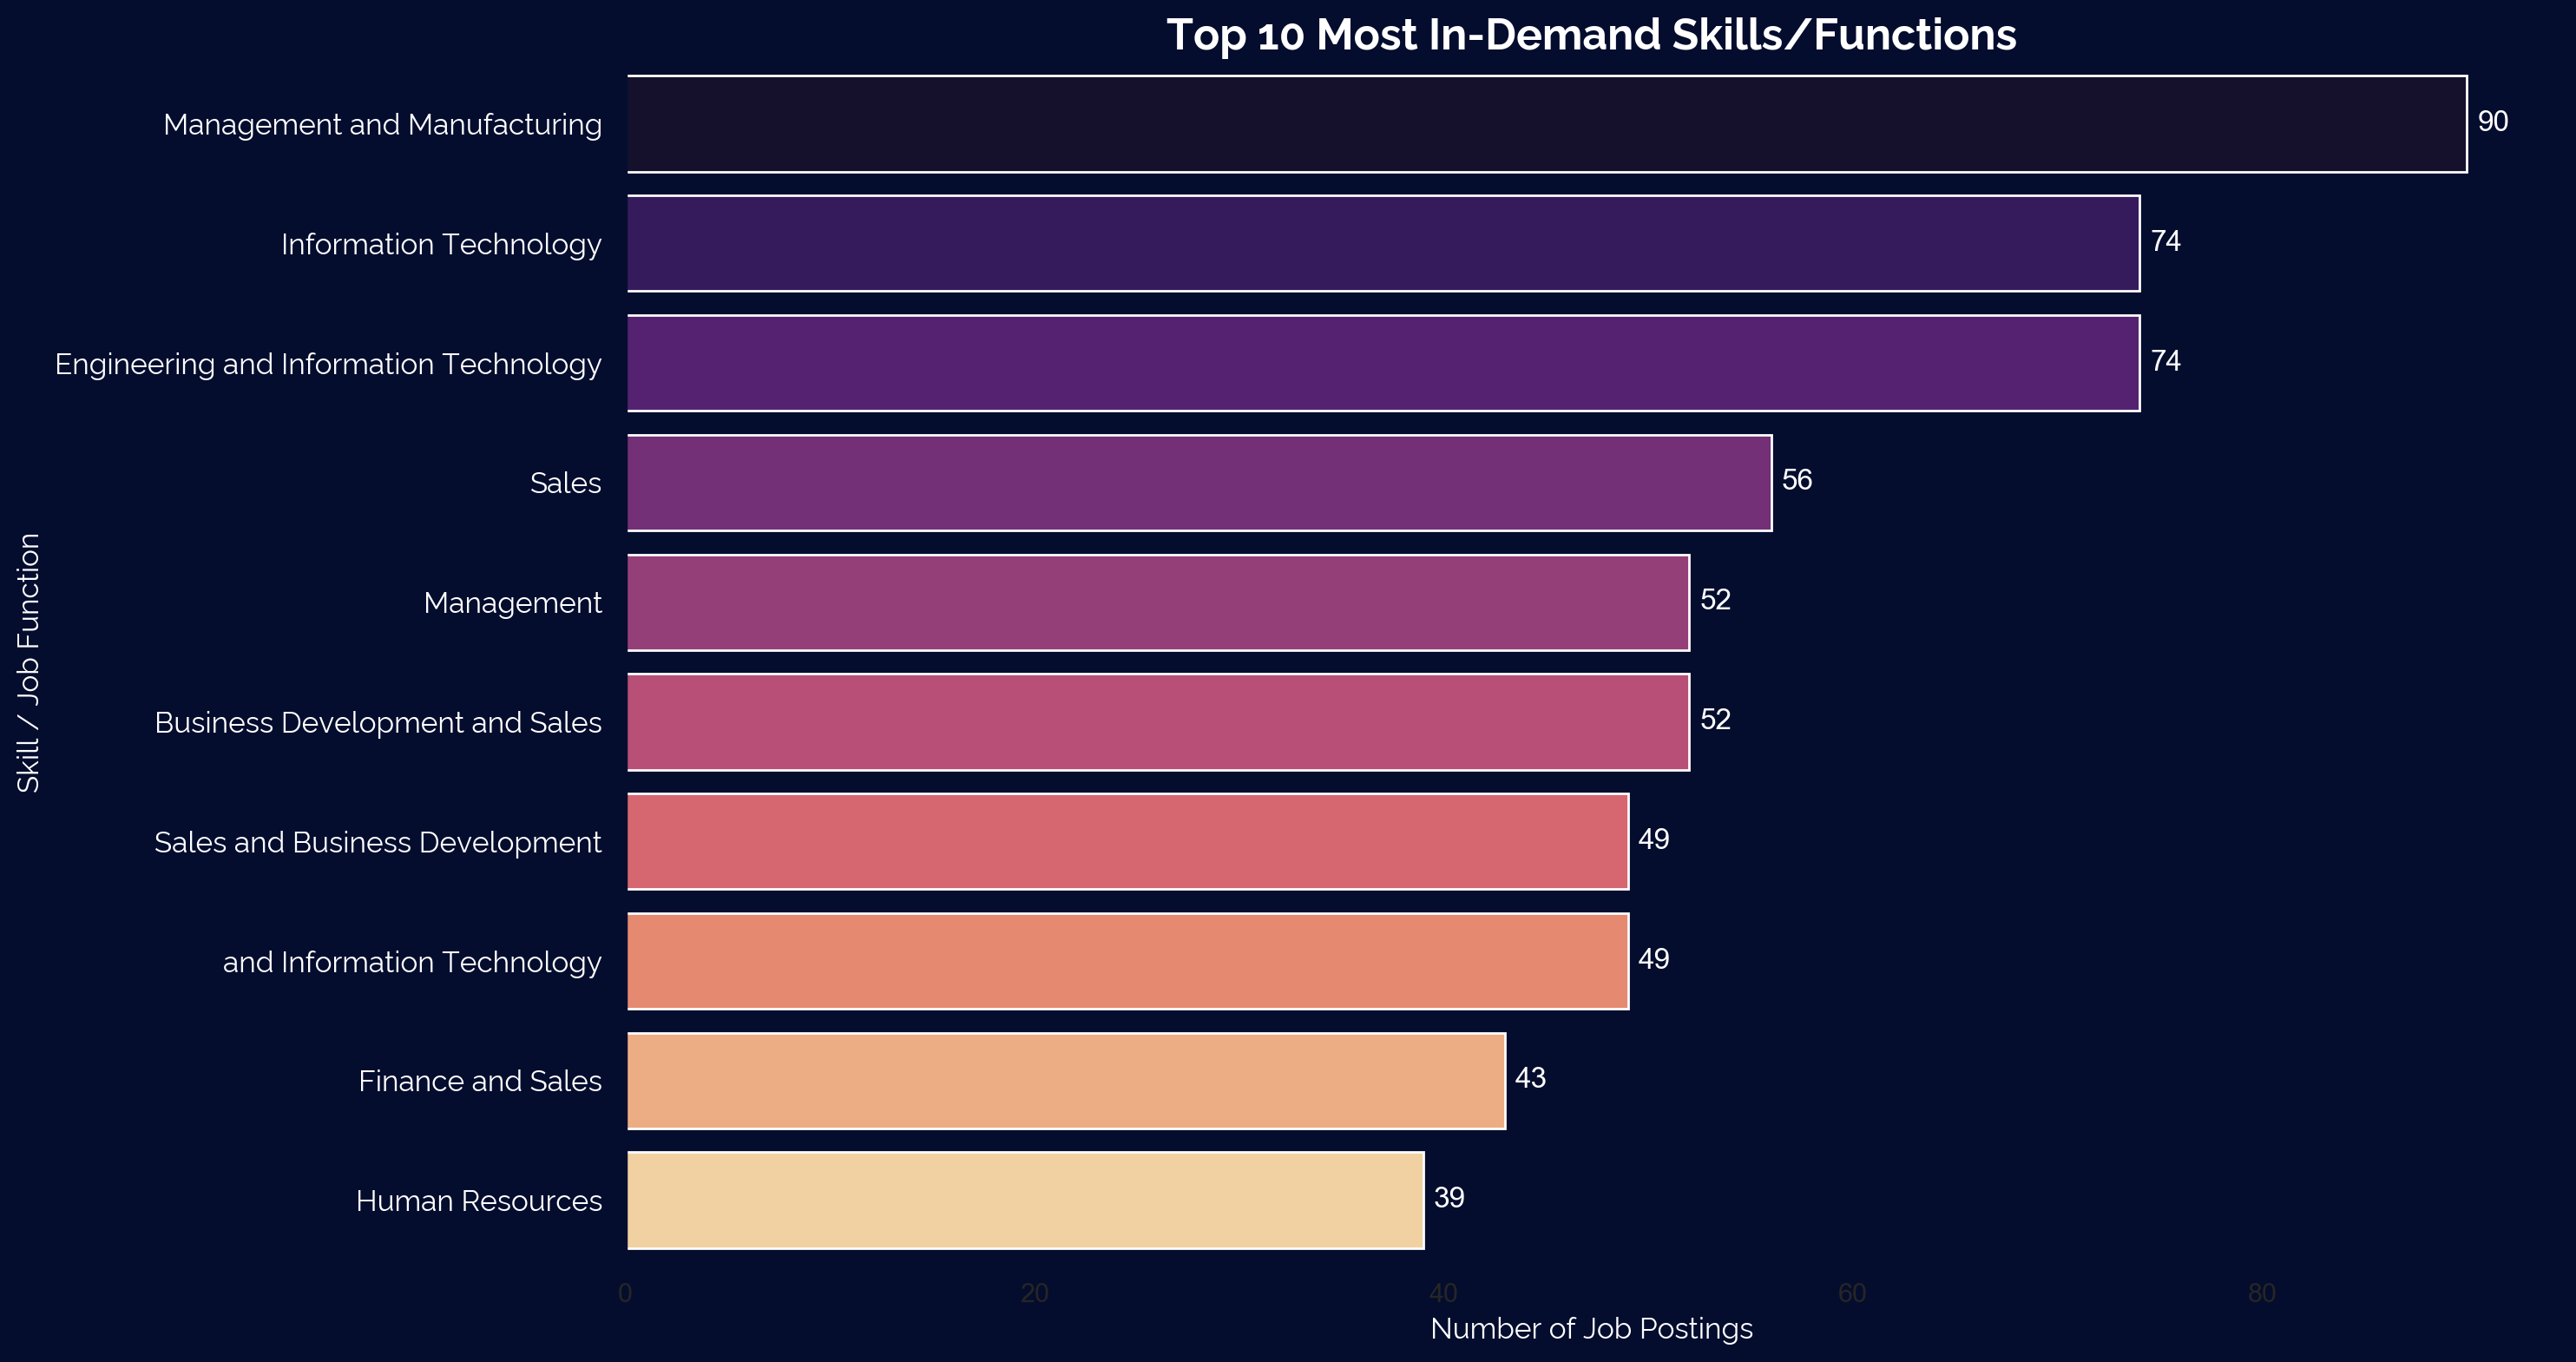

In [45]:
# --- Top 10 Most In-Demand Skills (Overall) ---
if not df.empty:
    top_skills = skills_df_clean['skill'].value_counts().nlargest(10)

    # Set the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create the bar plot with a more vibrant palette
    bars = sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma', 
                      hue=top_skills.index, dodge=False, ax=ax)
    
    # Set title and labels with explicit color
    plt.title('Top 10 Most In-Demand Skills/Functions', fontsize=18, weight='bold', color='white', fontfamily='raleway')
    plt.xlabel('Number of Job Postings', fontsize=12, color='white', fontfamily='raleway')
    plt.ylabel('Skill / Job Function', fontsize=12, color='white', fontfamily='raleway')
    plt.legend([],[], frameon=False) # Hide legend
    plt.yticks(fontsize=12, color='white', fontfamily='raleway')
    
    # Set all spines to be visible but with dark background color
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#040D2E')
    
    # Add count labels to the bars
    for i, v in enumerate(top_skills.values):
        ax.text(v + 0.5, i, str(v), color='white', va='center')
    
    # Make sure grid lines don't interfere with dark background
    ax.grid(False)
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()

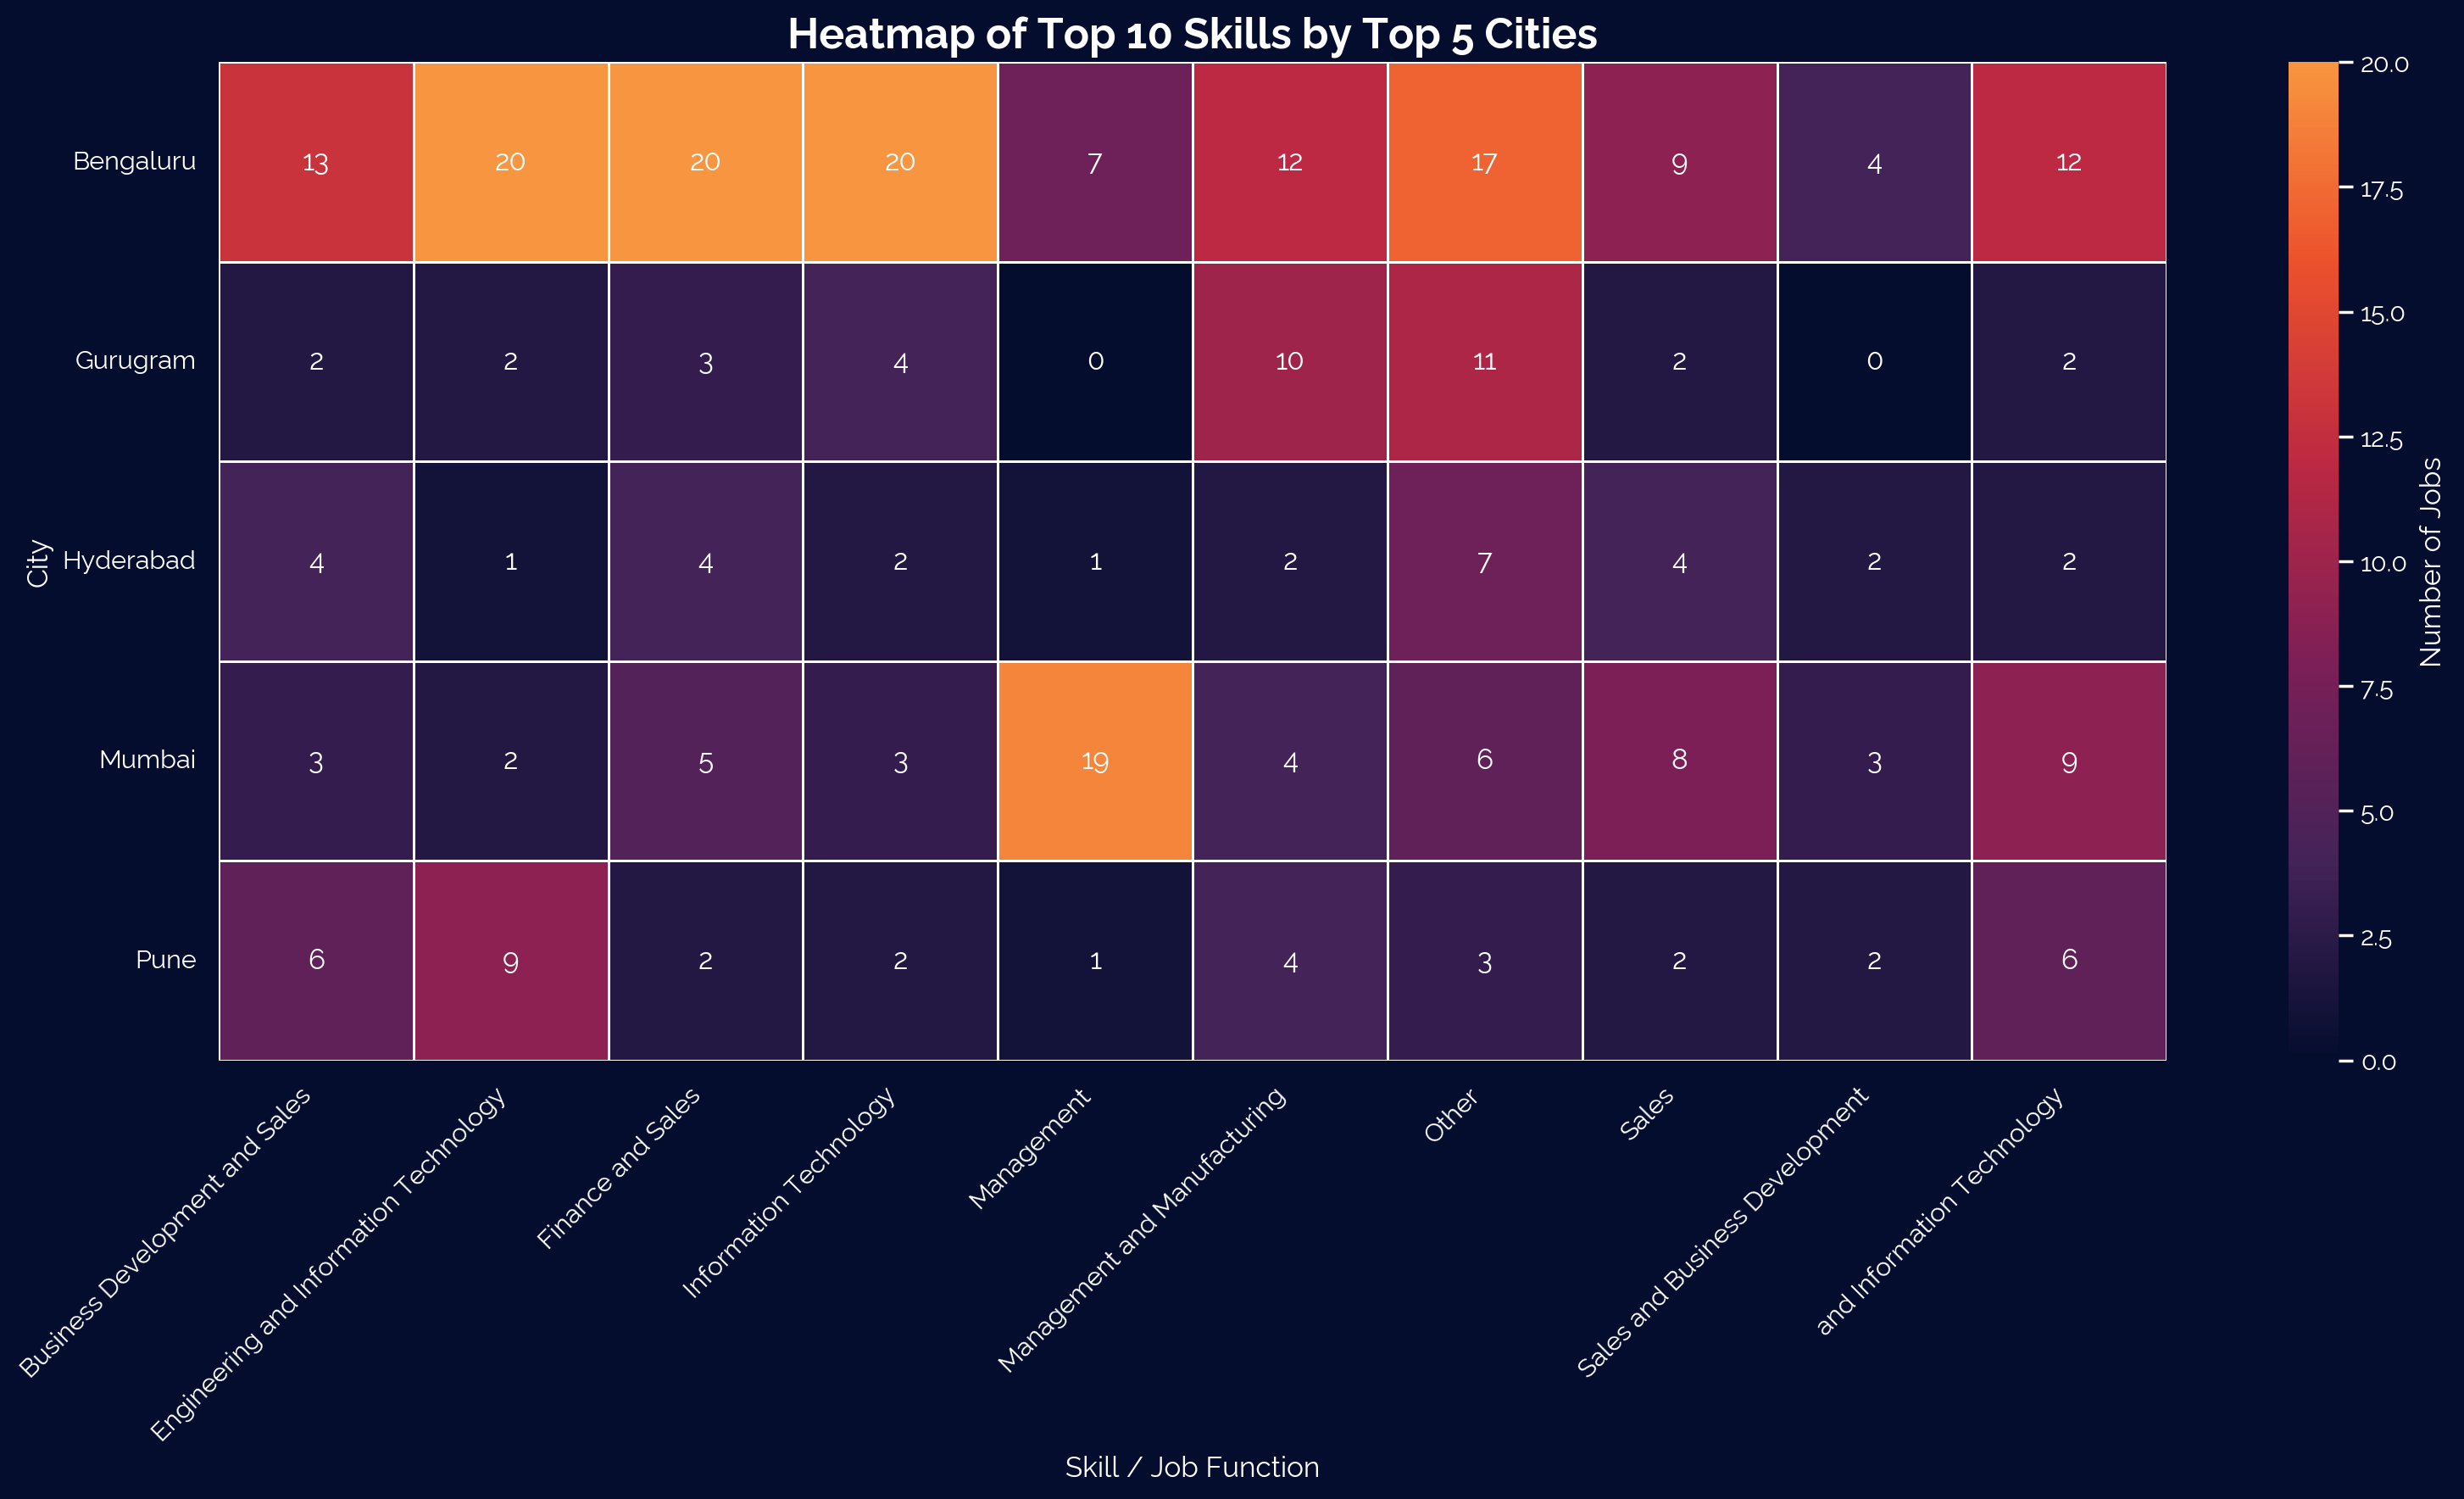

In [29]:
# --- Heatmap: Top 10 Skills by Top 5 Cities ---
if not df.empty:
    # Find top 5 cities by job count
    top_cities = df['city_cleaned'].value_counts().nlargest(5).index

    # Find top 10 skills overall
    top_10_skills = skills_df['skill'].value_counts().nlargest(10).index

    # Filter the skills dataframe
    city_skills_df = skills_df[skills_df['city_cleaned'].isin(top_cities) & skills_df['skill'].isin(top_10_skills)]

    # Create the pivot table for the heatmap
    city_skill_pivot = pd.crosstab(city_skills_df['city_cleaned'], city_skills_df['skill'])

    # Set the figure with explicit background color
    fig, ax = plt.subplots(figsize=(16, 9))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create a custom colormap that starts from dark blue
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['#040D2E', '#442359', '#7D1F57', '#BD2942', '#EC512C', '#F89540']
    custom_cmap = LinearSegmentedColormap.from_list('custom_dark_to_light', colors)
    
    # Generate the heatmap
    heatmap = sns.heatmap(city_skill_pivot, annot=True, fmt='d', cmap=custom_cmap, linewidths=.5,
                ax=ax, cbar_kws={'label': 'Number of Jobs'}, annot_kws={"color": "white"})
    
    # Fix colorbar label color
    heatmap.collections[0].colorbar.ax.yaxis.label.set_color('white')
    heatmap.collections[0].colorbar.ax.tick_params(colors='white')
    
    # Set title and labels with explicit color
    plt.title('Heatmap of Top 10 Skills by Top 5 Cities', fontsize=18, weight='bold', color='white', fontfamily='raleway')
    plt.xlabel('Skill / Job Function', fontsize=12, color='white', fontfamily='raleway')
    plt.ylabel('City', fontsize=12, color='white', fontfamily='raleway')
    plt.xticks(rotation=45, ha='right', color='white', fontfamily='raleway')
    plt.yticks(rotation=0, color='white', fontfamily='raleway')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()

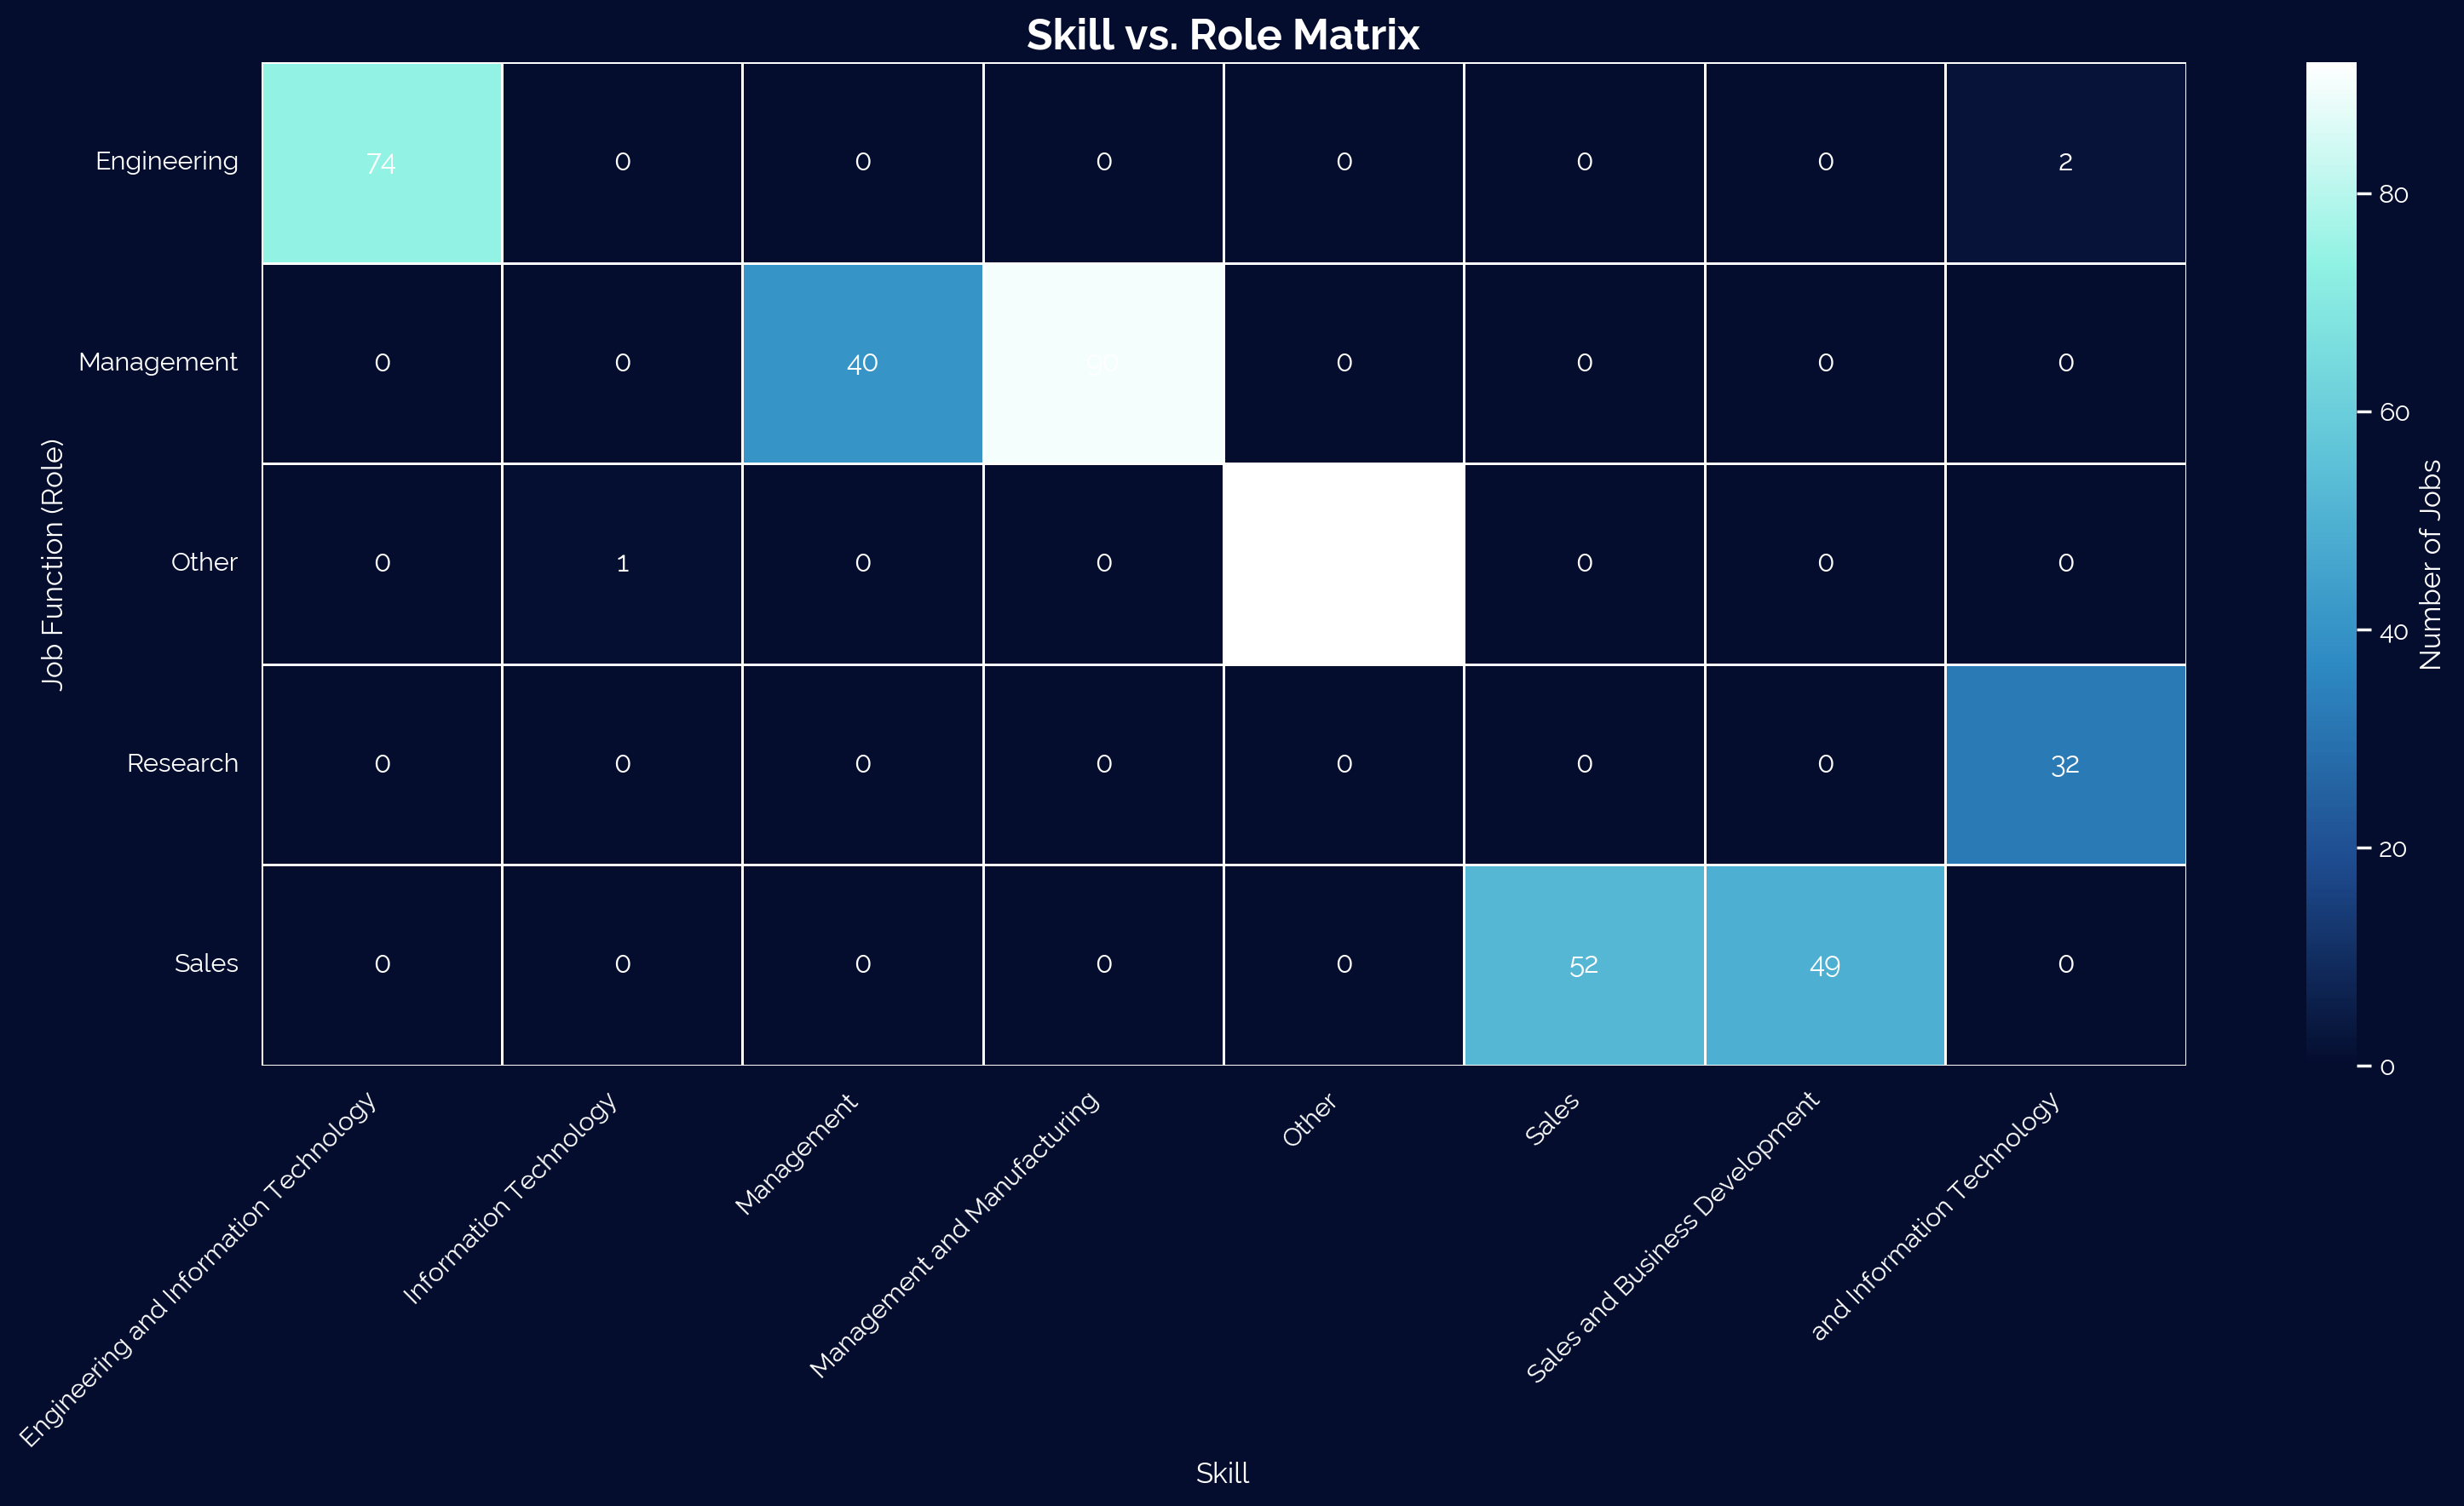

In [30]:
# --- Skill vs Role Matrix ---
if not df.empty:
    # Find top 5 functions by job count
    top_functions = skills_df['function'].value_counts().nlargest(5).index

    # Filter for top functions and top skills
    role_skills_df = skills_df[skills_df['function'].isin(top_functions) & skills_df['skill'].isin(top_10_skills)]

    # Create the pivot table
    role_skill_pivot = pd.crosstab(role_skills_df['function'], role_skills_df['skill'])

    # Set the figure with explicit background color
    fig, ax = plt.subplots(figsize=(16, 9))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create a custom colormap that starts from dark blue
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['#040D2E', '#1E4B8F', '#2E8AC3', '#5DC1D8', '#90F2E3', '#FFFFFF']
    custom_cmap = LinearSegmentedColormap.from_list('custom_blue_green', colors)
    
    # Generate the heatmap
    heatmap = sns.heatmap(role_skill_pivot, annot=True, fmt='d', cmap=custom_cmap, linewidths=.5,
                ax=ax, cbar_kws={'label': 'Number of Jobs'}, annot_kws={"color": "white"})
    
    # Fix colorbar label color
    heatmap.collections[0].colorbar.ax.yaxis.label.set_color('white')
    heatmap.collections[0].colorbar.ax.tick_params(colors='white')
    
    # Set title and labels with explicit color
    plt.title('Skill vs. Role Matrix', fontsize=18, weight='bold', color='white', fontfamily='raleway')
    plt.xlabel('Skill', fontsize=12, color='white', fontfamily='raleway')
    plt.ylabel('Job Function (Role)', fontsize=12, color='white', fontfamily='raleway')
    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(rotation=0, color='white')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()

/Users/tayyabkhan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3203: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


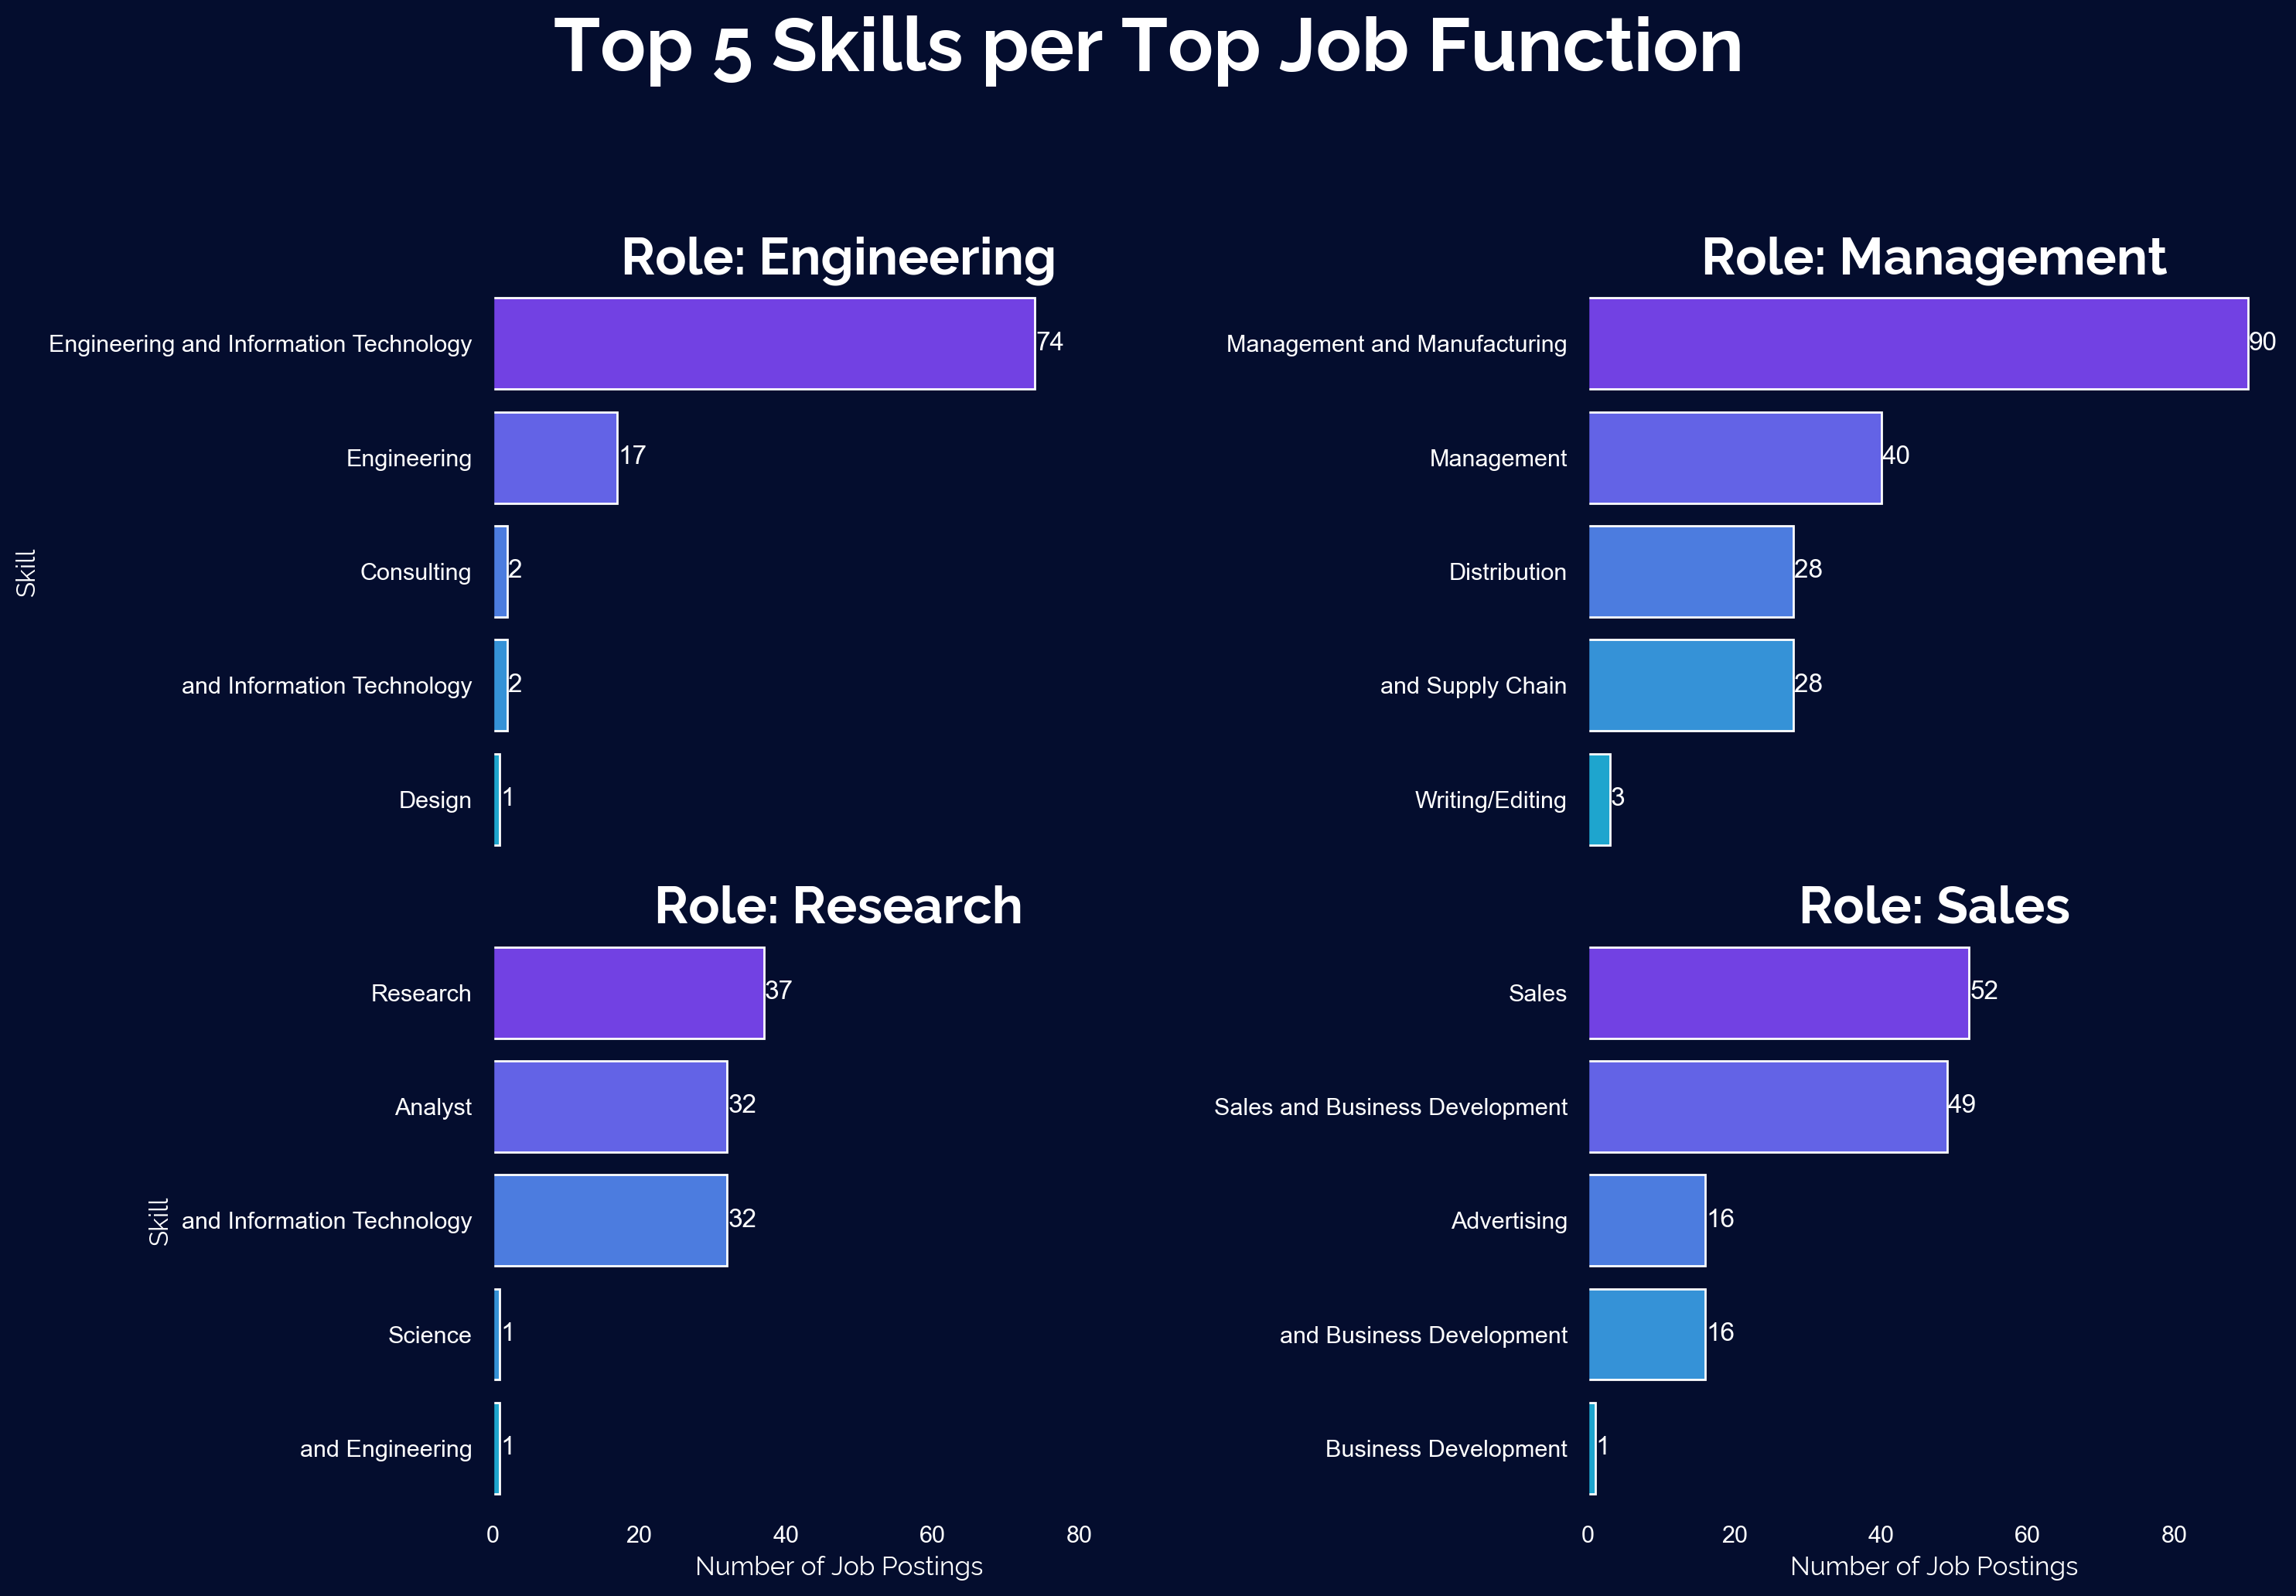

In [53]:
# --- Job Demand Recommendation Insights ---
if not df.empty:
    # Get top 4 functions
    top_4_functions = skills_df['function'].value_counts().nlargest(4).index

    # Filter for top functions
    filtered_df = skills_df[skills_df['function'].isin(top_4_functions)]

    # Calculate top 5 skills for each of the top 4 functions
    top_skills_by_function = filtered_df.groupby('function')['skill'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

    # Create a DataFrame from the result for plotting
    plot_df = top_skills_by_function.reset_index(name='count')

    # This ensures all plot elements have the correct background
    plt.rcParams.update({
        'figure.facecolor': '#040D2E',
        'axes.facecolor': '#040D2E',
        'savefig.facecolor': '#040D2E'
    })
    
    # Make sure the background is applied to the figure
    sns.set(rc={'figure.facecolor':'#040D2E', 'axes.facecolor':'#040D2E'})
    
    # Override the default style settings completely
    with plt.rc_context({'axes.facecolor':'#040D2E', 'figure.facecolor':'#040D2E', 'grid.color':'#1A2340'}):
        # Create the faceted plot
        g = sns.catplot(x='count', y='skill', col='function', data=plot_df, kind='bar', 
                    col_wrap=2, height=5, aspect=1.5, palette='rainbow', sharey=False)
        
        # Explicitly set the figure background
        g.fig.patch.set_facecolor('#040D2E')
        
        # Update title colors and text
        g.fig.suptitle('Top 5 Skills per Top Job Function', y=1.03, fontsize=35, weight='bold', color='white', fontfamily='raleway')
        g.set_titles("Role: {col_name}", size = 24,weight='bold', color='white', fontfamily='raleway')
        g.set_xlabels("Number of Job Postings", fontsize=12, color='white', fontfamily='raleway')
        g.set_ylabels("Skill", fontsize=12, color='white', fontfamily='raleway')
        
        # Update all axes in the FacetGrid
        for ax in g.axes.flat:
            # Set the facecolor explicitly for each axes
            ax.set_facecolor('#040D2E')
            
            # Remove grid for cleaner look
            ax.grid(False)
            
            # Set spine colors to match background
            for spine in ax.spines.values():
                spine.set_color('#040D2E')
                
            # Set tick colors to white
            for text in ax.texts:
                text.set_color('white')
            for tick in ax.get_xticklabels():
                tick.set_color('white')
            for tick in ax.get_yticklabels():
                tick.set_color('white')
                
            # Add count values to the end of each bar
            for i, p in enumerate(ax.patches):
                ax.text(p.get_width() + 0.1, p.get_y() + p.get_height()/2, 
                    str(int(p.get_width())), ha='left', va='center', color='white')
        
        # Force the background color for the figure again
        plt.gcf().set_facecolor('#040D2E')
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

In [33]:
skills_df

,job_id,job_title,company_name,time_posted,location,seniority_level,employment_type,job_function,industries,function,industry,city,city_cleaned,skill
0,4245908934,Associate Product Manager,Godrej Capital,2 days ago,"Mumbai, Maharashtra, India",Associate,Full-time,"Product Management, Engineering, and Finance",Strategic Management Services and Data Infrast...,Product,Strategic,Mumbai,Mumbai,Product Management
0,4245908934,Associate Product Manager,Godrej Capital,2 days ago,"Mumbai, Maharashtra, India",Associate,Full-time,"Product Management, Engineering, and Finance",Strategic Management Services and Data Infrast...,Product,Strategic,Mumbai,Mumbai,Engineering
0,4245908934,Associate Product Manager,Godrej Capital,2 days ago,"Mumbai, Maharashtra, India",Associate,Full-time,"Product Management, Engineering, and Finance",Strategic Management Services and Data Infrast...,Product,Strategic,Mumbai,Mumbai,and Finance
1,4245297547,Assistant Manager,Flipkart,3 days ago,"Mumbai, Maharashtra, India",Not Applicable,Full-time,Other,"Manufacturing and Technology, Information and ...",Other,Manufacturing,Mumbai,Mumbai,Other
2,4245556532,SDE Intern,Upstox,3 days ago,"Mumbai, Maharashtra, India",Not Applicable,Internship,Engineering and Information Technology,Financial Services,Engineering,Financial,Mumbai,Mumbai,Engineering and Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,4244368697,Incident Manager,Tata Consultancy Services,1 day ago,"Chennai, Tamil Nadu, India",Mid-Senior level,Full-time,Information Technology and Engineering,IT Services and IT Consulting and Information ...,Information,IT,Chennai,Chennai,Information Technology and Engineering
994,4246125945,Human Resources (HR) Associate in Bangalore,Scott International,1 day ago,"Bengaluru, Karnataka, India",Entry level,Full-time,Human Resources and Management,Advertising Services,Human,Advertising,Bengaluru,Bengaluru,Human Resources and Management
995,4245255151,Zonal Manager - South,Orient Electric,4 weeks ago,"Secunderābād, Telangana, India",Mid-Senior level,Full-time,Sales and Business Development,"Appliances, Electrical, and Electronics Manufa...",Sales,Appliances,Secunderābād,Secunderābād,Sales and Business Development
996,4245946125,"Research Analyst - Life Sciences, Pharma and M...",LSC - LifeSciences Consultants,2 days ago,"Navi Mumbai, Maharashtra, India",Mid-Senior level,Full-time,Research,Business Consulting and Services and Pharmaceu...,Research,Business,Navi,Navi,Research


In [40]:
skills_df['skill'].value_counts().head(20)

skill
Other                                     92
Management and Manufacturing              90
Engineering and Information Technology    74
Information Technology                    74
Sales                                     56
Business Development and Sales            52
Management                                52
and Information Technology                49
Sales and Business Development            49
Finance and Sales                         43
Human Resources                           39
Analyst                                   38
Research                                  37
Finance                                   31
Distribution                              30
and Supply Chain                          30
Administrative                            28
Marketing                                 22
Engineering                               20
Consulting                                19
Name: count, dtype: int64

In [54]:
# 1. Skill Demand Growth (By Listing Date)
# This visualization shows how skill demand has changed over time

if not df.empty and 'date_listed' in df.columns:
    # Convert date to datetime and extract month-year
    df['listing_date'] = pd.to_datetime(df['date_listed'], errors='coerce')
    df['month_year'] = df['listing_date'].dt.strftime('%Y-%m')
    
    # Merge with skills data
    time_skills_df = pd.merge(skills_df_clean, df[['id', 'month_year']], left_on='id', right_on='id')
    
    # Get top 5 skills for visualization clarity
    top_5_skills = skills_df_clean['skill_standardized'].value_counts().nlargest(5).index.tolist()
    
    # Filter for just these skills
    top_skills_time = time_skills_df[time_skills_df['skill_standardized'].isin(top_5_skills)]
    
    # Count skills by month
    skill_trends = pd.crosstab(
        index=top_skills_time['month_year'], 
        columns=top_skills_time['skill_standardized']
    ).fillna(0)
    
    # Sort by date
    skill_trends = skill_trends.sort_index()
    
    # Create the trend line plot
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('#040D2E')
    ax.set_facecolor('#040D2E')
    
    # Plot each skill as a line
    for skill in skill_trends.columns:
        ax.plot(skill_trends.index, skill_trends[skill], marker='o', linewidth=2, label=skill)
    
    # Set labels and title
    ax.set_title('Skill Demand Trends Over Time', fontsize=18, weight='bold', color='white')
    ax.set_xlabel('Month', fontsize=12, color='white')
    ax.set_ylabel('Number of Job Postings', fontsize=12, color='white')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, color='white')
    plt.yticks(color='white')
    
    # Add legend with white text
    legend = ax.legend(title='Skills', frameon=True, facecolor='#040D2E', edgecolor='white')
    legend.get_title().set_color('white')
    for text in legend.get_texts():
        text.set_color('white')
    
    plt.grid(True, color='#1A2340', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    if 'date_listed' not in df.columns:
        print("Date information not available in the dataset")
    else:
        print("DataFrame is empty, skipping visualization.")


Date information not available in the dataset


In [56]:



# 2. Skills Co-occurrence Network - What skills are commonly found together?
if not df.empty:
    from matplotlib import cm
    from matplotlib.colors import LinearSegmentedColormap
    import networkx as nx
    
    # Create a dataframe with just the job ID and standardized skill
    job_skills = skills_df_clean[['id', 'skill_standardized']].copy()
    
    # Get top 15 skills for clearer visualization
    top_15_skills = skills_df_clean['skill_standardized'].value_counts().nlargest(15).index.tolist()
    
    # Filter for just these skills
    filtered_job_skills = job_skills[job_skills['skill_standardized'].isin(top_15_skills)]
    
    # Create a skill co-occurrence matrix
    skill_combinations = []
    
    # Group by job ID and create combinations of skills within each job
    for job_id, job_data in filtered_job_skills.groupby('id'):
        skills = job_data['skill_standardized'].tolist()
        for i in range(len(skills)):
            for j in range(i+1, len(skills)):
                skill_combinations.append((skills[i], skills[j]))
    
    # Count co-occurrences
    co_occurrences = pd.Series(skill_combinations).value_counts().reset_index()
    co_occurrences.columns = ['skill_pair', 'count']
    
    # Split the pairs into separate columns
    co_occurrences[['skill1', 'skill2']] = pd.DataFrame(co_occurrences['skill_pair'].tolist(), index=co_occurrences.index)
    
    # Create a network graph
    G = nx.Graph()
    
    # Add nodes (skills)
    for skill in top_15_skills:
        # Size nodes by their frequency
        size = skills_df_clean['skill_standardized'].value_counts()[skill]
        G.add_node(skill, size=size)
    
    # Add edges (co-occurrences)
    for _, row in co_occurrences.iterrows():
        G.add_edge(row['skill1'], row['skill2'], weight=row['count'])
    
    # Create custom colormap from dark blue to bright colors
    colors = ['#040D2E', '#2E4482', '#5D7AD9', '#00A0DC', '#E4119E', '#FFFFFF']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    
    # Set up the plot
    plt.figure(figsize=(16, 12))
    plt.gca().set_facecolor('#040D2E')
    plt.gcf().set_facecolor('#040D2E')
    
    # Get positions for nodes
    pos = nx.spring_layout(G, seed=42, k=0.5)
    
    # Get node sizes proportional to their frequency
    node_sizes = [G.nodes[node]['size'] * 50 for node in G.nodes()]
    
    # Get edge weights
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    
    # Draw the network
    nodes = nx.draw_networkx_nodes(G, pos, 
                           node_size=node_sizes,
                           node_color=node_sizes, 
                           cmap=cmap, 
                           alpha=0.9)
    
    edges = nx.draw_networkx_edges(G, pos, 
                           width=[w/5 for w in edge_weights],
                           edge_color='#FFFFFF', 
                           alpha=0.3)
    
    labels = nx.draw_networkx_labels(G, pos, 
                            font_size=12, 
                            font_color='white')
    
    # Add a title
    plt.title('Skill Co-occurrence Network', fontsize=20, color='white', pad=20)
    
    # Add explanation text
    plt.figtext(0.5, 0.01, 
                "Node size represents skill frequency. Edge thickness represents how often skills appear together.", 
                ha="center", 
                color="white", 
                fontsize=14,
                bbox={"facecolor":"#040D2E", "edgecolor":"white", "boxstyle":"round,pad=0.5"})
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty, skipping visualization.")

KeyError: "['id'] not in index"

In [58]:




# 3. Geographic Bubble Map - Where are the jobs concentrated?
if not df.empty and 'city_cleaned' in df.columns:
    import plotly.express as px
    from plotly.offline import init_notebook_mode, iplot
    import plotly.graph_objects as go
    import plotly.io as pio
    
    # Set up plotly for notebook display
    init_notebook_mode(connected=True)
    
    # Define city coordinates (approximate - you can make these more accurate)
    # This would typically use an API for geocoding but we'll use a manual approach
    city_coords = {
        'Bangalore': (12.9716, 77.5946),
        'Mumbai': (19.0760, 72.8777),
        'Delhi': (28.7041, 77.1025),
        'Hyderabad': (17.3850, 78.4867),
        'Chennai': (13.0827, 80.2707),
        'Pune': (18.5204, 73.8567),
        'Kolkata': (22.5726, 88.3639),
        'Noida': (28.5355, 77.3910),
        'Gurgaon': (28.4595, 77.0266),
        'Ahmedabad': (23.0225, 72.5714),
        # Add more cities as needed
    }
    
    # Count jobs by city
    city_counts = df['city_cleaned'].value_counts().reset_index()
    city_counts.columns = ['city', 'count']
    
    # Add coordinates
    city_counts['lat'] = city_counts['city'].map(lambda x: city_coords.get(x, [None])[0])
    city_counts['lon'] = city_counts['city'].map(lambda x: city_coords.get(x, [None, None])[1])
    
    # Remove rows with missing coordinates
    city_counts = city_counts.dropna(subset=['lat', 'lon'])
    
    # Create bubble map
    fig = px.scatter_geo(
        city_counts,
        lat='lat',
        lon='lon',
        size='count',
        hover_name='city',
        hover_data=['count'],
        projection='natural earth',
        scope='asia',
        title='Job Distribution Across Indian Cities',
        size_max=50,
        color='count',
        color_continuous_scale=px.colors.sequential.Plasma
    )
    
    # Update layout for dark theme
    fig.update_layout(
        paper_bgcolor='#040D2E',
        geo=dict(
            showland=True,
            landcolor='#1A2340',
            showocean=True,
            oceancolor='#0C1F4B',
            showlakes=False,
            showcountries=True,
            countrycolor='white',
            showcoastlines=True,
            coastlinecolor='white',
            showframe=False,
        ),
        title_font=dict(color='white', size=20),
        font=dict(color='white'),
        coloraxis_colorbar=dict(title='Job Count'),
    )
    
    # Zoom in on India
    fig.update_geos(
        center=dict(lat=20, lon=78),
        projection_scale=4,
    )
    
    # Show the plot
    fig.show()
else:
    print("City data is not available, skipping visualization.")

City data is not available, skipping visualization.


In [59]:
df

,job_id,job_title,company_name,time_posted,location,seniority_level,employment_type,job_function,industries,function,industry,city
0,4245908934,Associate Product Manager,Godrej Capital,2 days ago,"Mumbai, Maharashtra, India",Associate,Full-time,"Product Management, Engineering, and Finance",Strategic Management Services and Data Infrast...,Product,Strategic,Mumbai
1,4245297547,Assistant Manager,Flipkart,3 days ago,"Mumbai, Maharashtra, India",Not Applicable,Full-time,Other,"Manufacturing and Technology, Information and ...",Other,Manufacturing,Mumbai
2,4245556532,SDE Intern,Upstox,3 days ago,"Mumbai, Maharashtra, India",Not Applicable,Internship,Engineering and Information Technology,Financial Services,Engineering,Financial,Mumbai
3,4243900490,Market Consultant,Google,2 days ago,"Gurugram, Haryana, India",Not Applicable,Full-time,"Business Development, Human Resources, and Con...","Information Services and Technology, Informati...",Business,Information,Gurugram
4,4245054940,Area Sales Manger,Godrej Consumer Products Limited,3 days ago,"Chennai, Tamil Nadu, India",Mid-Senior level,Full-time,Sales,Personal Care Product Manufacturing and Consum...,Sales,Personal,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...
993,4244368697,Incident Manager,Tata Consultancy Services,1 day ago,"Chennai, Tamil Nadu, India",Mid-Senior level,Full-time,Information Technology and Engineering,IT Services and IT Consulting and Information ...,Information,IT,Chennai
994,4246125945,Human Resources (HR) Associate in Bangalore,Scott International,1 day ago,"Bengaluru, Karnataka, India",Entry level,Full-time,Human Resources and Management,Advertising Services,Human,Advertising,Bengaluru
995,4245255151,Zonal Manager - South,Orient Electric,4 weeks ago,"Secunderābād, Telangana, India",Mid-Senior level,Full-time,Sales and Business Development,"Appliances, Electrical, and Electronics Manufa...",Sales,Appliances,Secunderābād
996,4245946125,"Research Analyst - Life Sciences, Pharma and M...",LSC - LifeSciences Consultants,2 days ago,"Navi Mumbai, Maharashtra, India",Mid-Senior level,Full-time,Research,Business Consulting and Services and Pharmaceu...,Research,Business,Navi


In [61]:




# 4. Salary Distribution by Job Function (if salary data available)
if not df.empty and 'salary' in df.columns:
    # Create a function to extract salary information
    def extract_salary(salary_str):
        if pd.isna(salary_str):
            return None
        # Basic processing - you may need to adjust based on actual data format
        try:
            # Handle ranges like "₹5,00,000 - ₹8,00,000"
            if '-' in salary_str:
                parts = salary_str.split('-')
                # Just take the average for simplicity
                cleaned_parts = [p.replace('₹', '').replace(',', '').strip() for p in parts]
                values = [float(p) for p in cleaned_parts if p.replace('.', '').isdigit()]
                if values:
                    return sum(values) / len(values)
            else:
                # Single value
                cleaned = salary_str.replace('₹', '').replace(',', '').strip()
                if cleaned.replace('.', '').isdigit():
                    return float(cleaned)
        except:
            return None
        return None
    
    # Apply the function to extract salaries
    df['salary_value'] = df['salary'].apply(extract_salary)
    
    # Remove rows with missing salary
    salary_df = df.dropna(subset=['salary_value'])
    
    if len(salary_df) > 0:
        # Combine with skill data
        salary_skill_df = pd.merge(
            salary_df[['id', 'salary_value', 'function']], 
            skills_df_clean[['id', 'skill_standardized']].drop_duplicates(),
            on='id'
        )
        
        # Get top skills for visualization
        top_skills_for_salary = skills_df_clean['skill_standardized'].value_counts().nlargest(6).index.tolist()
        
        # Filter for just these skills
        filtered_salary_df = salary_skill_df[salary_skill_df['skill_standardized'].isin(top_skills_for_salary)]
        
        # Set up the plot
        fig, ax = plt.subplots(figsize=(14, 10))
        fig.patch.set_facecolor('#040D2E')
        ax.set_facecolor('#040D2E')
        
        # Create violin plots
        sns.violinplot(
            x='skill_standardized', 
            y='salary_value', 
            data=filtered_salary_df,
            palette='rocket',
            inner='quartile',
            ax=ax
        )
        
        # Set title and labels
        ax.set_title('Salary Distribution by Skill Category', fontsize=18, weight='bold', color='white')
        ax.set_xlabel('Skill Category', fontsize=14, color='white')
        ax.set_ylabel('Salary (₹)', fontsize=14, color='white')
        
        # Format y-axis as lakhs
        from matplotlib.ticker import FuncFormatter
        def lakhs_formatter(x, pos):
            if x >= 100000:
                return f'{x/100000:.1f}L'
            return f'{x/1000:.0f}K'
        
        ax.yaxis.set_major_formatter(FuncFormatter(lakhs_formatter))
        
        # Style ticks and grid
        ax.tick_params(colors='white')
        ax.grid(color='#1A2340', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=30, ha='right', color='white')
        plt.tight_layout()
        plt.show()
    else:
        print("No valid salary data available for visualization")
else:
    print("Salary data is not available in the dataset")

Salary data is not available in the dataset


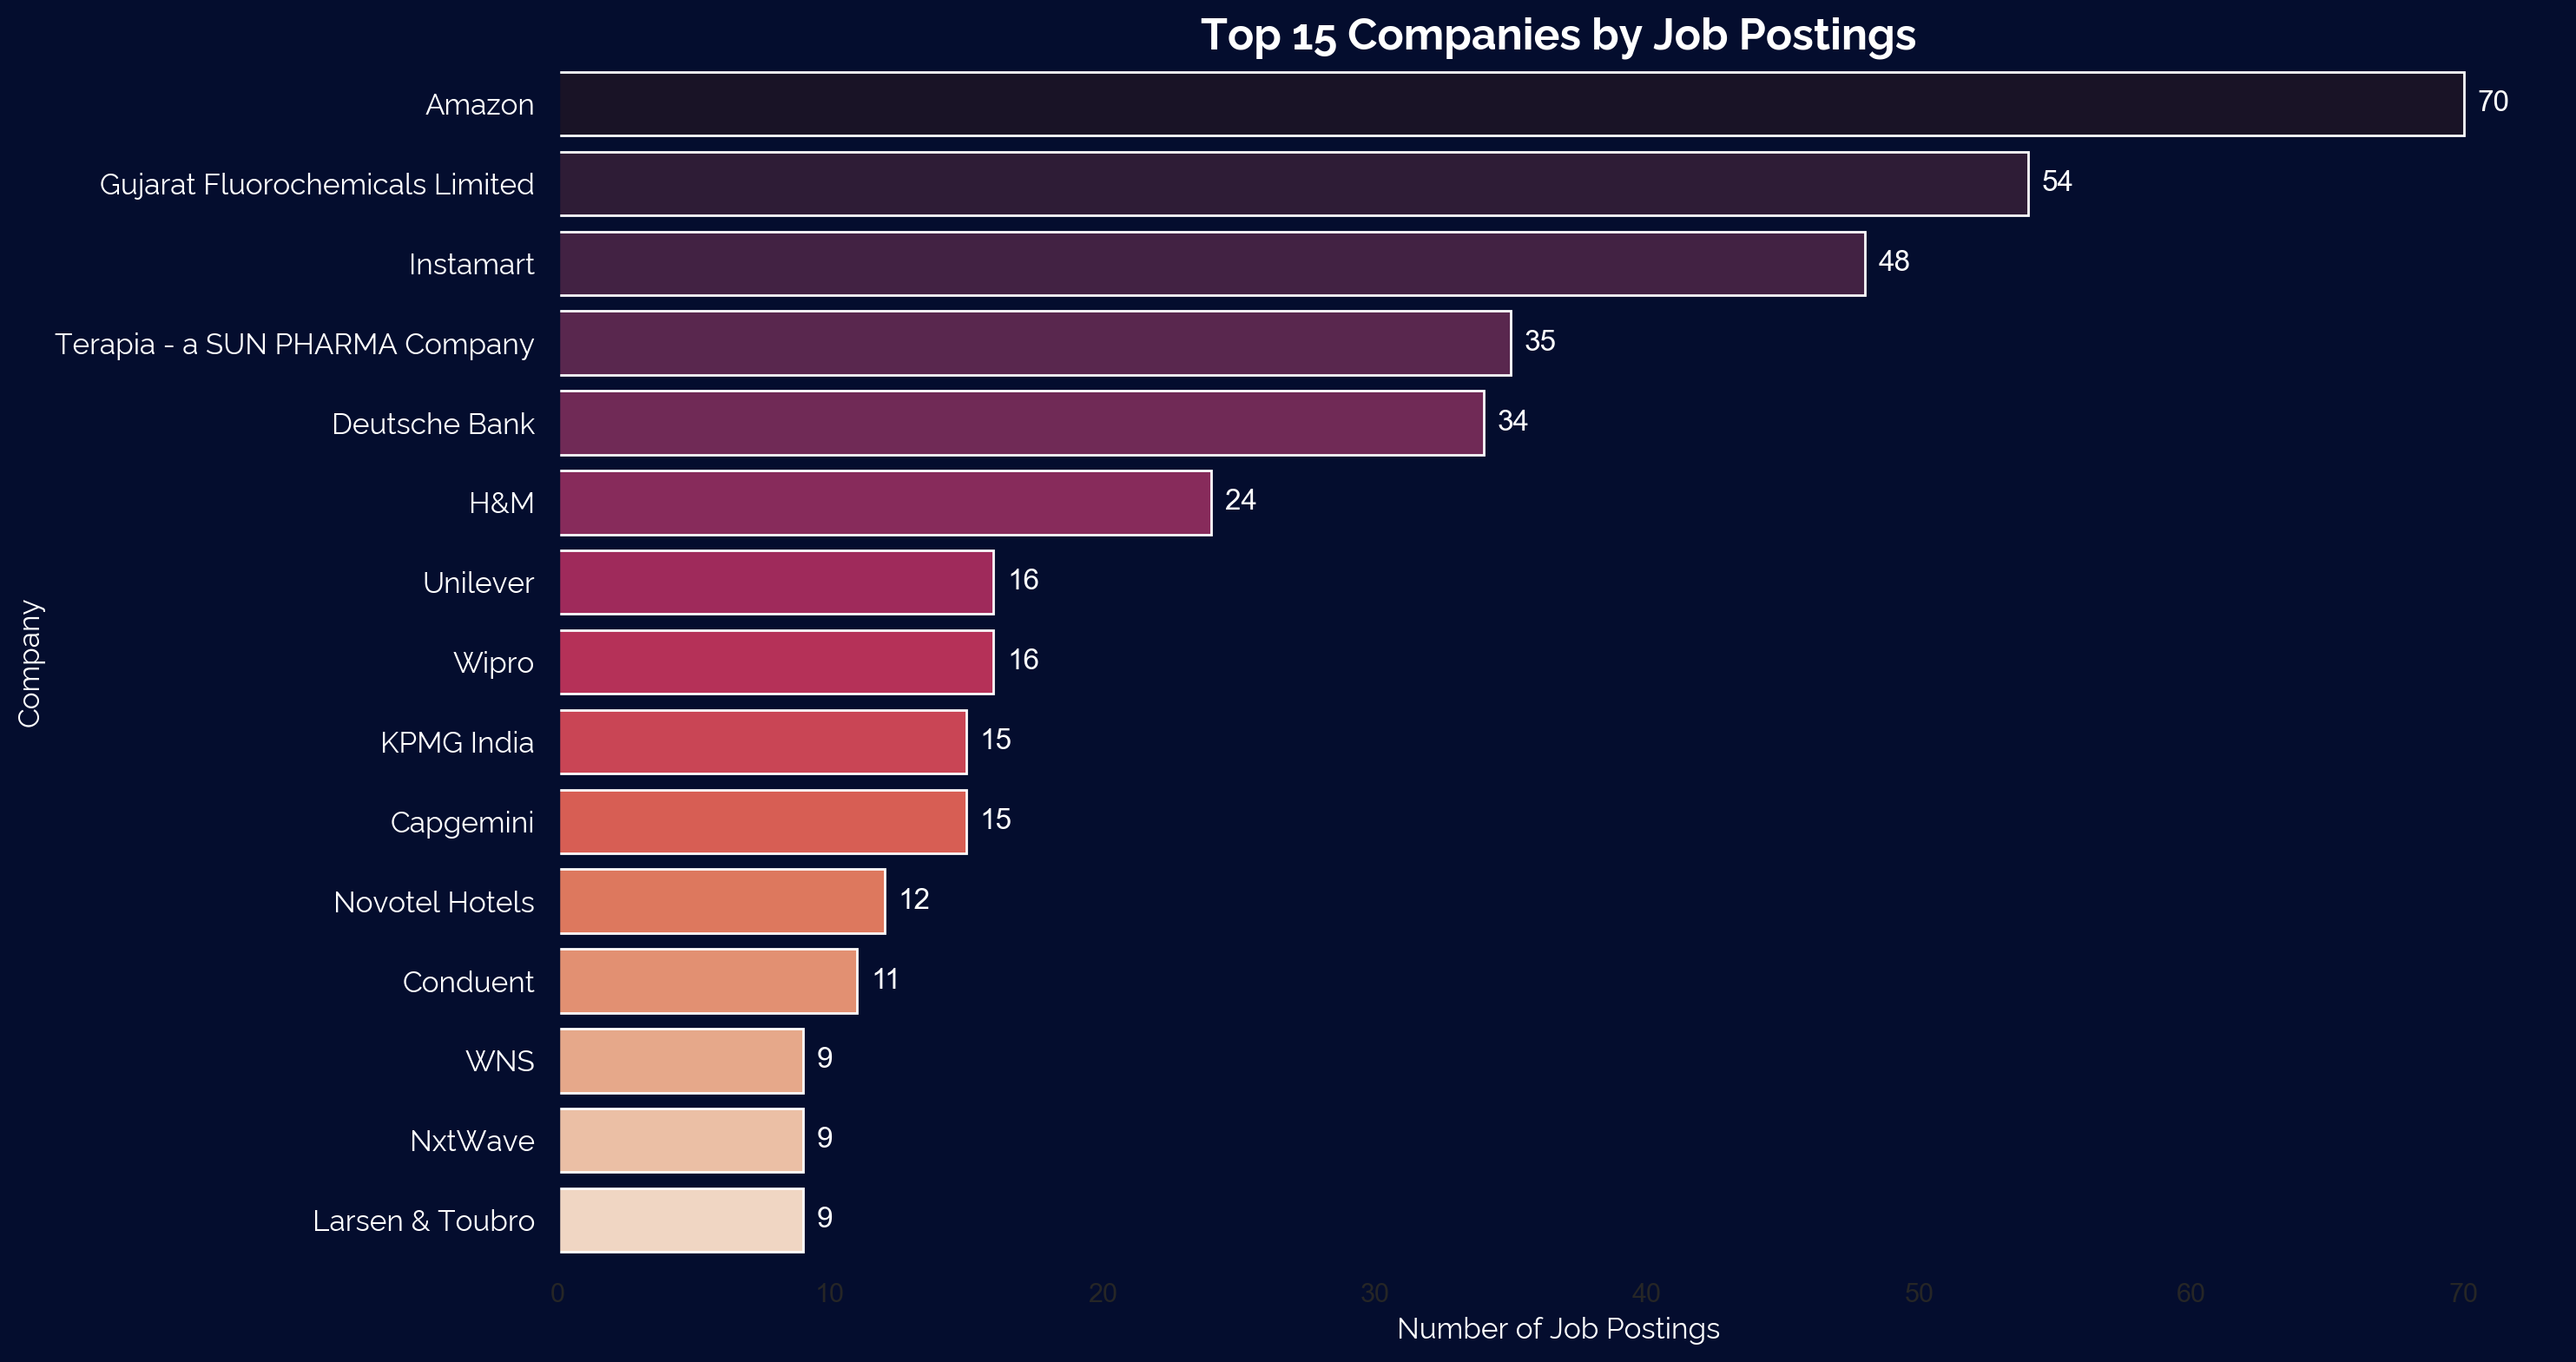

In [67]:


#Top Companies with Most Job Listings
if not df.empty:
    # Count jobs by company and get top 15
    company_counts = df['company_name'].value_counts().nlargest(15)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create horizontal bar chart with vibrant colors
    bars = sns.barplot(x=company_counts.values, y=company_counts.index, 
                      palette='rocket', ax=ax)
    
    # Add count labels to the bars
    for i, v in enumerate(company_counts.values):
        ax.text(v + 0.5, i, str(v), color='white', va='center')
    
    # Set title and labels with explicit color
    plt.title('Top 15 Companies by Job Postings',  font = 'raleway', fontsize=18, fontweight='bold', color='white')
    plt.xlabel('Number of Job Postings', font = 'raleway',  fontsize=12, color='white')
    plt.ylabel('Company', font = 'raleway',  fontsize=12, color='white')
    plt.yticks(fontsize=12, color='white', fontfamily='raleway')
    # Style spines and remove grid
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#040D2E')
    ax.grid(False)
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()

/var/folders/nh/vhd94srn54g9j26skl7kk3hm0000gn/T/ipykernel_84967/825492991.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['industry'].fillna('Not Specified', inplace=True)


AttributeError: 'function' object has no attribute 'plot'

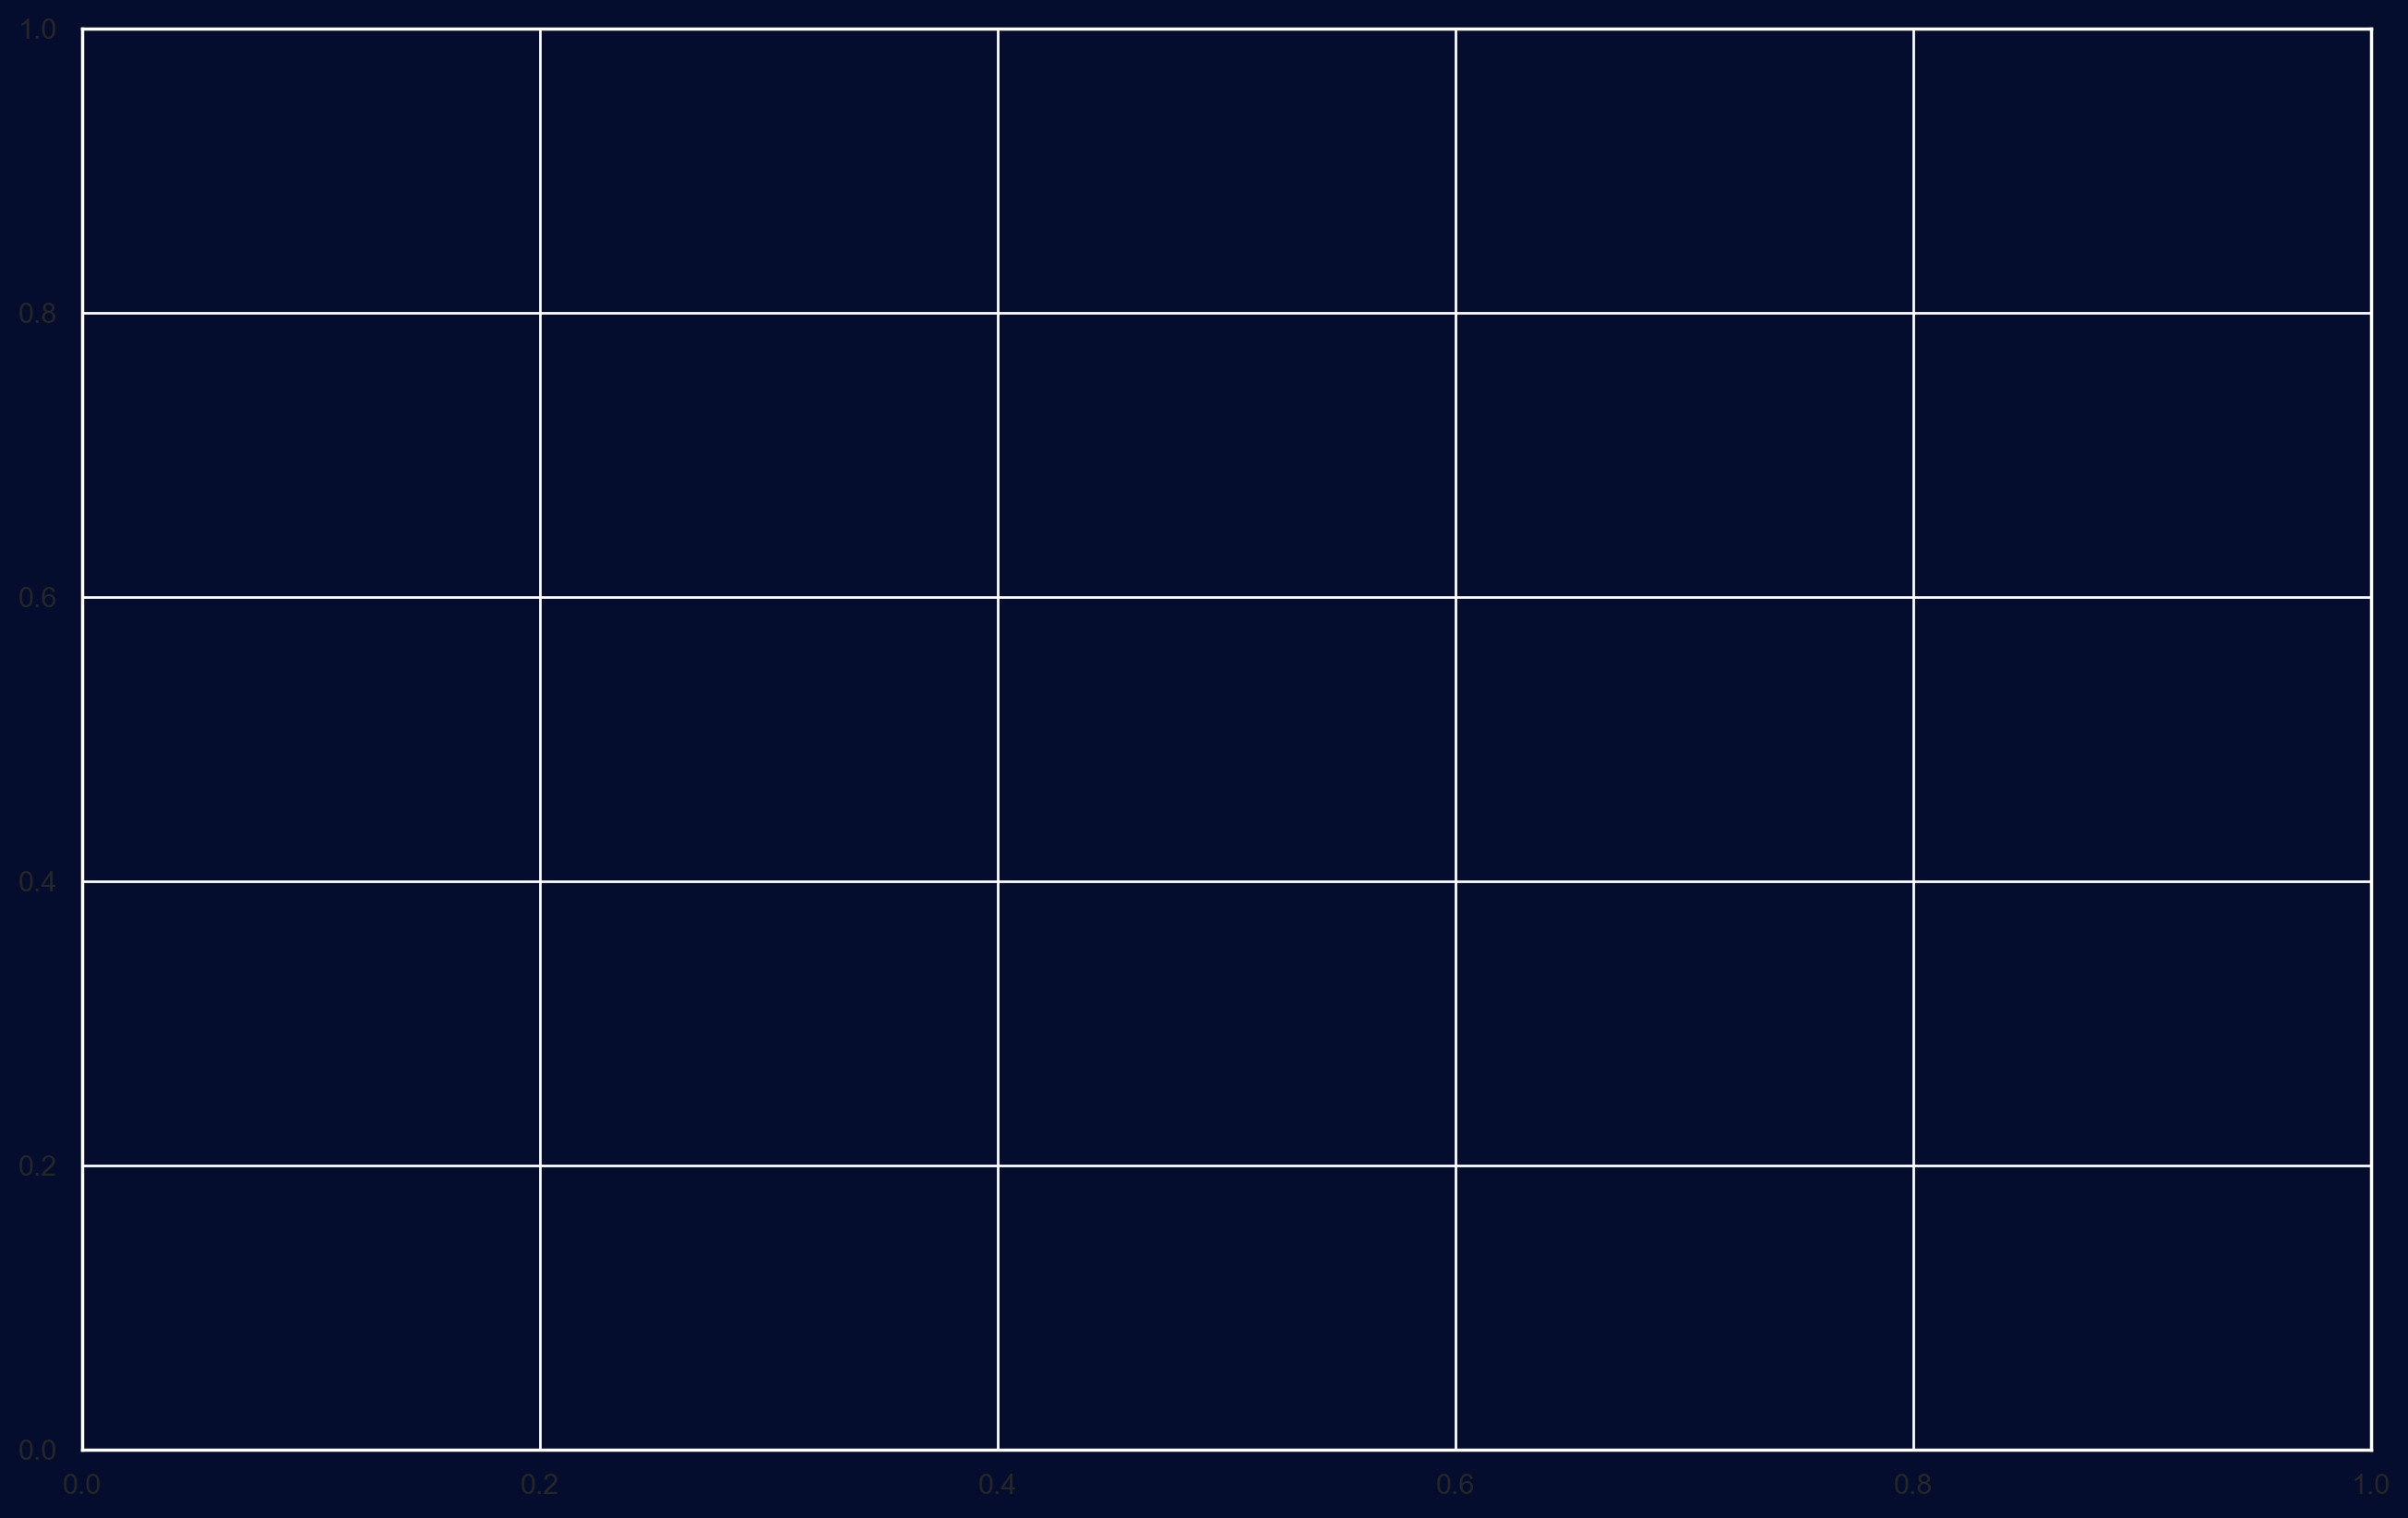

In [69]:


#Industry Concentration
if not df.empty:
    # Clean the 'industry' column by filling nulls or empties
    df['industry'].fillna('Not Specified', inplace=True)
    df['industry'] = df['industry'].replace('', 'Not Specified')
    
    # Count jobs by industry and get top 15
    industry_counts = df['industry'].value_counts().nlargest(15)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(16, 10))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create a treemap
    from squarify import squarify
    
    # Normalize sizes for better visualization
    sizes = industry_counts.values
    norm = plt.Normalize(min(sizes), max(sizes))
    colors = plt.cm.plasma(norm(sizes))
    
    # Create the treemap
    squarify.plot(
        sizes=sizes, 
        label=[f"{l}\n({s})" for l, s in zip(industry_counts.index, sizes)],
        alpha=.8,
        color=colors,
        text_kwargs={'color':'white', 'fontsize':10, 'fontweight':'bold'},
        ax=ax
    )
    
    # Set title with explicit color
    plt.title('Top 15 Industries by Job Postings', fontsize=18, weight='bold', color='white')
    
    # Remove axes
    plt.axis('off')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()

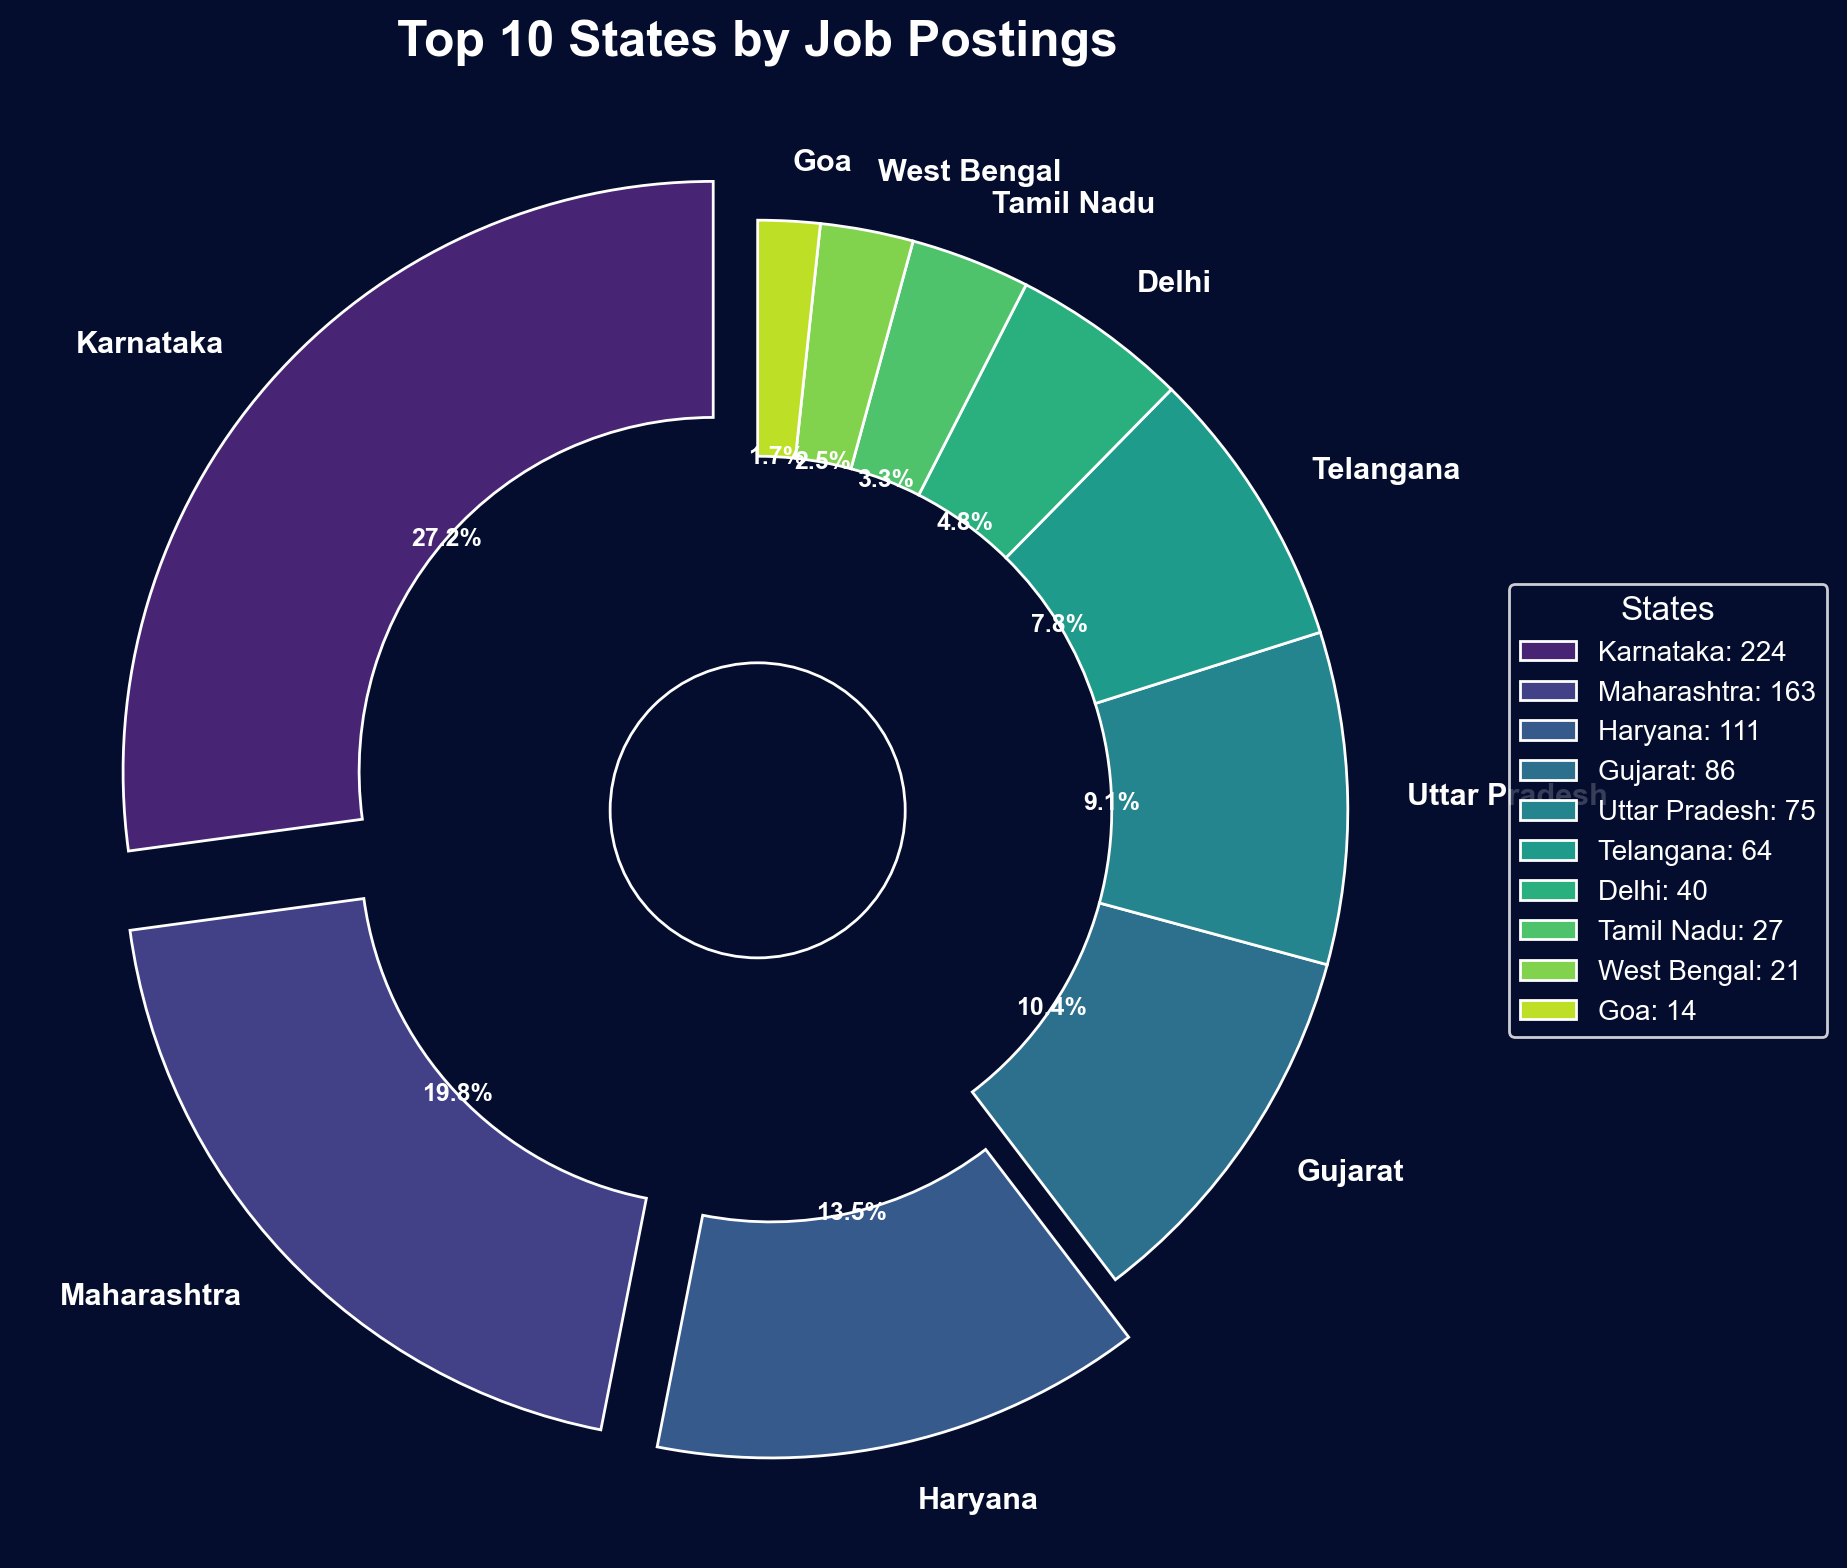

In [71]:




# 9. Geographic Distribution of Jobs
if not df.empty:
    # Clean and prepare location data
    df['state'] = df['location'].str.split(', ').str[-2]
    
    # Count jobs by state and get top 10
    state_counts = df['state'].value_counts().nlargest(10)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create custom colormap
    colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(state_counts)))
    
    # Create horizontal bar chart with exploding slices for top states
    wedges, texts, autotexts = ax.pie(
        state_counts.values,
        labels=state_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=[0.1 if i < 3 else 0 for i in range(len(state_counts))],  # Explode top 3
        wedgeprops=dict(width=0.4, edgecolor='white'),  # For donut chart effect
        textprops=dict(color='white', fontweight='bold')
    )
    
    # Create a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.25, fc='#040D2E')
    fig.gca().add_artist(centre_circle)
    
    # Customize text appearance
    for autotext in autotexts:
        autotext.set_fontsize(9)
    
    # Add a title with explicit color
    plt.title('Top 10 States by Job Postings', fontsize=18, weight='bold', color='white')
    
    # Add a legend with job counts
    legend_labels = [f'{state}: {count}' for state, count in zip(state_counts.index, state_counts.values)]
    plt.legend(
        wedges, 
        legend_labels,
        title="States",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        prop={'size': 10}
    )
    
    # Style the legend
    leg = ax.get_legend()
    leg.get_title().set_color('white')
    for text in leg.get_texts():
        text.set_color('white')
    leg.get_frame().set_facecolor('#040D2E')
    leg.get_frame().set_edgecolor('white')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()

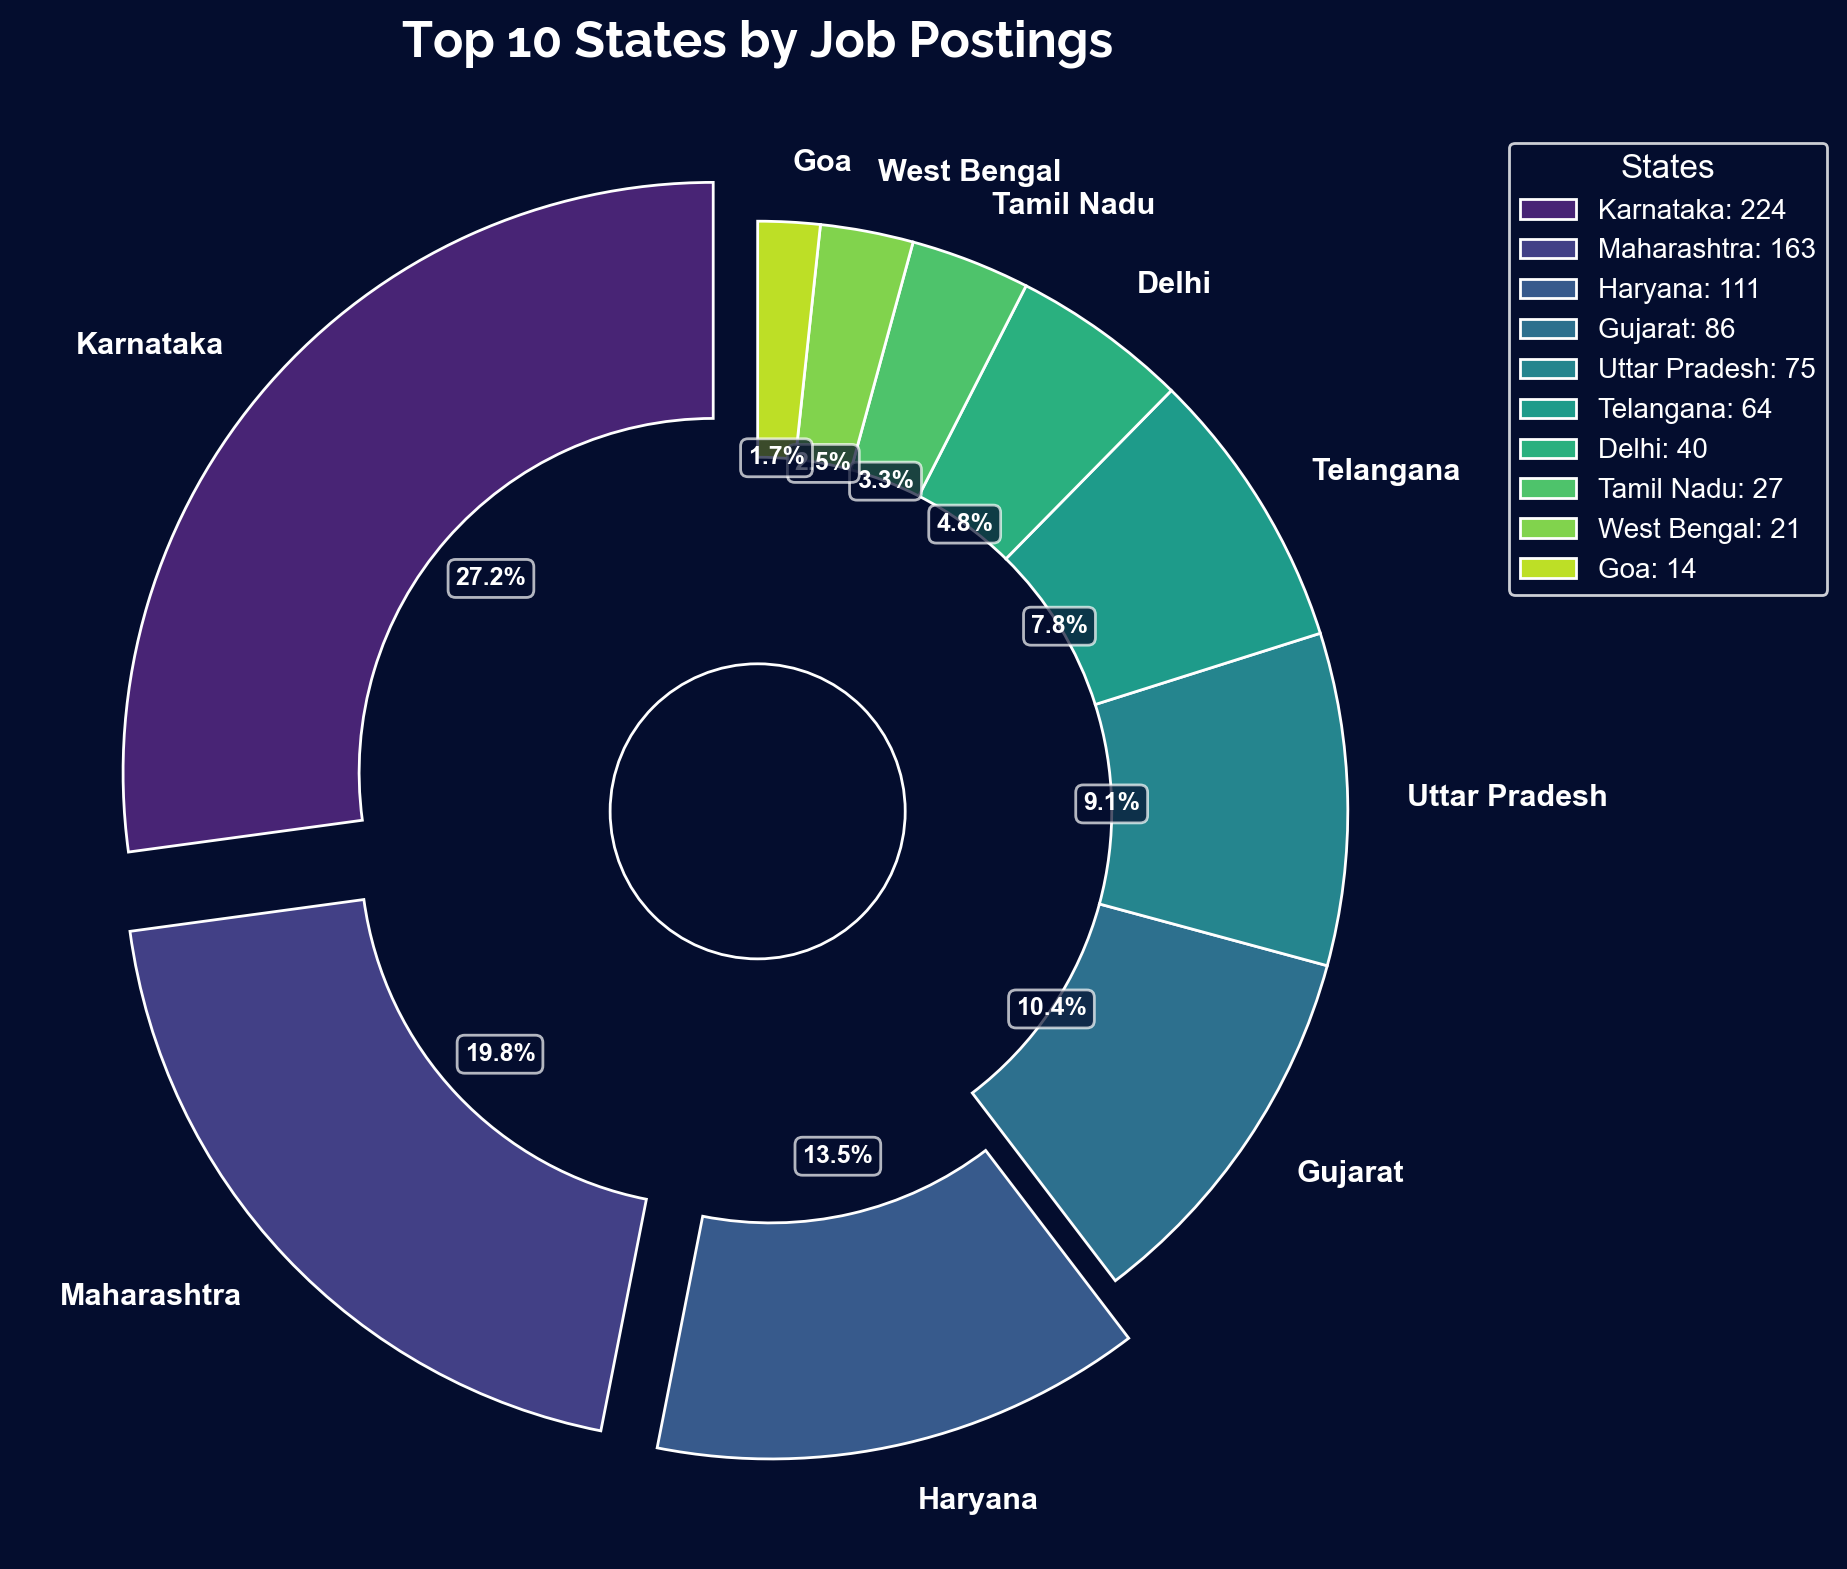

In [76]:
# 9. Geographic Distribution of Jobs
if not df.empty:
    # Clean and prepare location data
    df['state'] = df['location'].str.split(', ').str[-2]
    
    # Count jobs by state and get top 10
    state_counts = df['state'].value_counts().nlargest(10)
    
    # Set up the figure with explicit background color
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#040D2E')  # Figure background
    ax.set_facecolor('#040D2E')  # Axes background
    
    # Create custom colormap
    colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(state_counts)))
    
    # Create horizontal bar chart with exploding slices for top states
    wedges, texts, autotexts = ax.pie(
        state_counts.values,
        labels=state_counts.index,
        autopct='',  # Remove autopct to place manually
        startangle=90,
        colors=colors,
        explode=[0.1 if i < 3 else 0 for i in range(len(state_counts))],  # Explode top 3
        wedgeprops=dict(width=0.4, edgecolor='white'),  # For donut chart effect
        textprops=dict(color='white', fontweight='bold')
    )
    
    # Create a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.25, fc='#040D2E')
    fig.gca().add_artist(centre_circle)
    
    # Add percentage labels inside the pie slices
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        
        # Determine radius position (adjust for best placement)
        # Closer to outer edge for better visibility, but inside the slice
        radius = 0.6
        
        # Calculate percentage
        percentage = state_counts.values[i] / sum(state_counts.values) * 100
        
        # Place the text
        ax.text(x * radius, y * radius, f'{percentage:.1f}%', 
                ha='center', va='center', 
                fontsize=9, color='white', 
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", fc='#040D2E', ec="white", alpha=0.7))
    
    
    # Add a title with explicit color
    plt.title('Top 10 States by Job Postings', font = 'raleway', fontsize=18, weight='bold', color='white')
    
    # Add a legend with job counts - moved lower on the figure
    legend_labels = [f'{state}: {count}' for state, count in zip(state_counts.index, state_counts.values)]
    plt.legend(
        wedges, 
        legend_labels,
        title="States",
        loc="center left",
        bbox_to_anchor=(1, 0.3, 0.5, 1),  # Moved lower by adjusting y-coordinate (0.3 instead of 0)
        prop={'size': 10}
    )
    
    # Style the legend
    leg = ax.get_legend()
    leg.get_title().set_color('white')
    for text in leg.get_texts():
        text.set_color('white')
    leg.get_frame().set_facecolor('#040D2E')
    leg.get_frame().set_edgecolor('white')
    
    # Force the background color for the figure
    plt.gcf().set_facecolor('#040D2E')
    plt.tight_layout()
    plt.show()
